In [1]:
library(tidyverse)
library(data.table)
library(patchwork)
library(viridis)
library(scales)
library(plotly)
library(mclust)
library(parallel)
library(rgl)
library(RColorBrewer)
library(cmdstanr)

library(htmlwidgets)

library(mclust)
library(dplyr)
library(igraph)
library(posterior)
library(matrixStats)

── Attaching core tidyverse packages ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.2     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

次のパッケージを付け加えます: ‘data.table’


以下のオブジェクトは ‘package:lubridate’ からマスクされています:

    hour, isoweek, mday, minute, month, quarter, second, wday, week,
    yday, year


以下のオブジェクトは ‘package:dplyr

In [2]:
scale_factor <- 8

setwd("/Users/jumpeiito/Dropbox/論文/antigenicity/PLANT/analysis/vaccine_selection")

season.v <- c("2010SH", "2010NH", "2011SH", "2011NH", "2012SH", "2012NH", "2013SH", "2013NH", "2014SH", "2014NH", "2015SH", "2015NH", "2016SH", "2016NH", "2017SH", "2017NH", "2018SH", "2018NH", "2019SH", "2019NH", "2020SH", "2020NH", "2021SH", "2021NH", "2022SH", "2022NH", "2023SH", "2023NH")


set_cmdstan_path("/Users/jumpeiito/.cmdstan/cmdstan-2.34.1")

#cmdstanr::install_cmdstan(version="2.34.1")

#cmdstanr::rebuild_cmdstan()

stan_f.name <- "/Users/jumpeiito/Dropbox/論文/antigenicity/PLANT/analysis/vaccine_selection/script/multinomial_independent.ver2_with_forcast.stan"
multi_nomial_model <- cmdstan_model(stan_f.name)


season_analyzed.v <- c("2014SH", "2014NH",
              "2015SH", "2015NH", "2016SH", "2016NH", "2017SH", "2017NH", "2018SH", "2018NH", "2019SH", "2019NH",
              "2020SH", "2020NH", "2021SH", "2021NH", "2022SH", "2022NH", "2023SH", "2023NH")


CmdStan path set to: /Users/jumpeiito/.cmdstan/cmdstan-2.34.1



In [3]:
data_full.name <- "/Users/jumpeiito/Dropbox/論文/antigenicity/PLANT/analysis/all_span_cartography/final_full_250304_ver2_12__s20000_lr1.00E-04_wd0.01_rwd0.005_csew0_csea0_sw0.2_csewv0_swv0.2_cw0.05_rid256_dp0.05_eid64_edp0.1_lgw0.01_bs16_facebookesm2_t33_650M_UR50D/PLANT_epiflu_human_241212_with_coords_20cluster.csv"
data_full <- read.csv(data_full.name, header =T, comment.char="")

season_count.df <- data_full %>% group_by(season) %>% summarize(count = n())
season_count.df <- season_count.df %>% filter(season %in% season_analyzed.v[3:length(season_analyzed.v)])


[1] "2014SH"


Warning message:
“Specifying width/height in layout() is now deprecated.
Please specify in ggplotly() or plot_ly()”
Warning message in RColorBrewer::brewer.pal(max(N, 3L), "Set2"):
“n too large, allowed maximum for palette Set2 is 8
Returning the palette you asked for with that many colors
”
Warning message in RColorBrewer::brewer.pal(max(N, 3L), "Set2"):
“n too large, allowed maximum for palette Set2 is 8
Returning the palette you asked for with that many colors
”


[1] "cl 12"
Running MCMC with 4 parallel chains...

Chain 1 Iteration:    1 / 2500 [  0%]  (Warmup) 
Chain 2 Iteration:    1 / 2500 [  0%]  (Warmup) 
Chain 3 Iteration:    1 / 2500 [  0%]  (Warmup) 
Chain 4 Iteration:    1 / 2500 [  0%]  (Warmup) 
Chain 1 Iteration:  100 / 2500 [  4%]  (Warmup) 
Chain 3 Iteration:  100 / 2500 [  4%]  (Warmup) 
Chain 4 Iteration:  100 / 2500 [  4%]  (Warmup) 
Chain 2 Iteration:  100 / 2500 [  4%]  (Warmup) 
Chain 1 Iteration:  200 / 2500 [  8%]  (Warmup) 
Chain 3 Iteration:  200 / 2500 [  8%]  (Warmup) 
Chain 2 Iteration:  200 / 2500 [  8%]  (Warmup) 
Chain 4 Iteration:  200 / 2500 [  8%]  (Warmup) 
Chain 1 Iteration:  300 / 2500 [ 12%]  (Warmup) 
Chain 2 Iteration:  300 / 2500 [ 12%]  (Warmup) 
Chain 3 Iteration:  300 / 2500 [ 12%]  (Warmup) 
Chain 4 Iteration:  300 / 2500 [ 12%]  (Warmup) 
Chain 1 Iteration:  400 / 2500 [ 16%]  (Warmup) 
Chain 3 Iteration:  400 / 2500 [ 16%]  (Warmup) 
Chain 2 Iteration:  400 / 2500 [ 16%]  (Warmup) 
Chain 4 Iteration

`summarise()` has grouped output by 'metacluster', 'subclade'. You can override using the `.groups` argument.
Warning message:
“Removed 375 rows containing missing values or values outside the scale range (`geom_line()`).”
Warning message:
“Removed 375 rows containing missing values or values outside the scale range (`geom_line()`).”
Warning message:
“Specifying width/height in layout() is now deprecated.
Please specify in ggplotly() or plot_ly()”
Warning message:
“Specifying width/height in layout() is now deprecated.
Please specify in ggplotly() or plot_ly()”
Warning message in RColorBrewer::brewer.pal(max(N, 3L), "Set2"):
“n too large, allowed maximum for palette Set2 is 8
Returning the palette you asked for with that many colors
”
Warning message in RColorBrewer::brewer.pal(max(N, 3L), "Set2"):
“n too large, allowed maximum for palette Set2 is 8
Returning the palette you asked for with that many colors
”
Warning message:
“Specifying width/height in layout() is now deprecated.
Pleas

[1] "2014NH"


Warning message:
“Specifying width/height in layout() is now deprecated.
Please specify in ggplotly() or plot_ly()”
Warning message in RColorBrewer::brewer.pal(max(N, 3L), "Set2"):
“n too large, allowed maximum for palette Set2 is 8
Returning the palette you asked for with that many colors
”
Warning message in RColorBrewer::brewer.pal(max(N, 3L), "Set2"):
“n too large, allowed maximum for palette Set2 is 8
Returning the palette you asked for with that many colors
”


[1] "cl 4"
Running MCMC with 4 parallel chains...

Chain 1 Iteration:    1 / 2500 [  0%]  (Warmup) 
Chain 2 Iteration:    1 / 2500 [  0%]  (Warmup) 
Chain 3 Iteration:    1 / 2500 [  0%]  (Warmup) 
Chain 4 Iteration:    1 / 2500 [  0%]  (Warmup) 
Chain 3 Iteration:  100 / 2500 [  4%]  (Warmup) 
Chain 4 Iteration:  100 / 2500 [  4%]  (Warmup) 
Chain 2 Iteration:  100 / 2500 [  4%]  (Warmup) 
Chain 1 Iteration:  100 / 2500 [  4%]  (Warmup) 
Chain 3 Iteration:  200 / 2500 [  8%]  (Warmup) 
Chain 4 Iteration:  200 / 2500 [  8%]  (Warmup) 
Chain 2 Iteration:  200 / 2500 [  8%]  (Warmup) 
Chain 1 Iteration:  200 / 2500 [  8%]  (Warmup) 
Chain 3 Iteration:  300 / 2500 [ 12%]  (Warmup) 
Chain 4 Iteration:  300 / 2500 [ 12%]  (Warmup) 
Chain 1 Iteration:  300 / 2500 [ 12%]  (Warmup) 
Chain 2 Iteration:  300 / 2500 [ 12%]  (Warmup) 
Chain 3 Iteration:  400 / 2500 [ 16%]  (Warmup) 
Chain 4 Iteration:  400 / 2500 [ 16%]  (Warmup) 
Chain 1 Iteration:  400 / 2500 [ 16%]  (Warmup) 
Chain 2 Iteration:

`summarise()` has grouped output by 'metacluster', 'subclade'. You can override using the `.groups` argument.
Warning message:
“Removed 370 rows containing missing values or values outside the scale range (`geom_line()`).”
Warning message:
“Removed 370 rows containing missing values or values outside the scale range (`geom_line()`).”


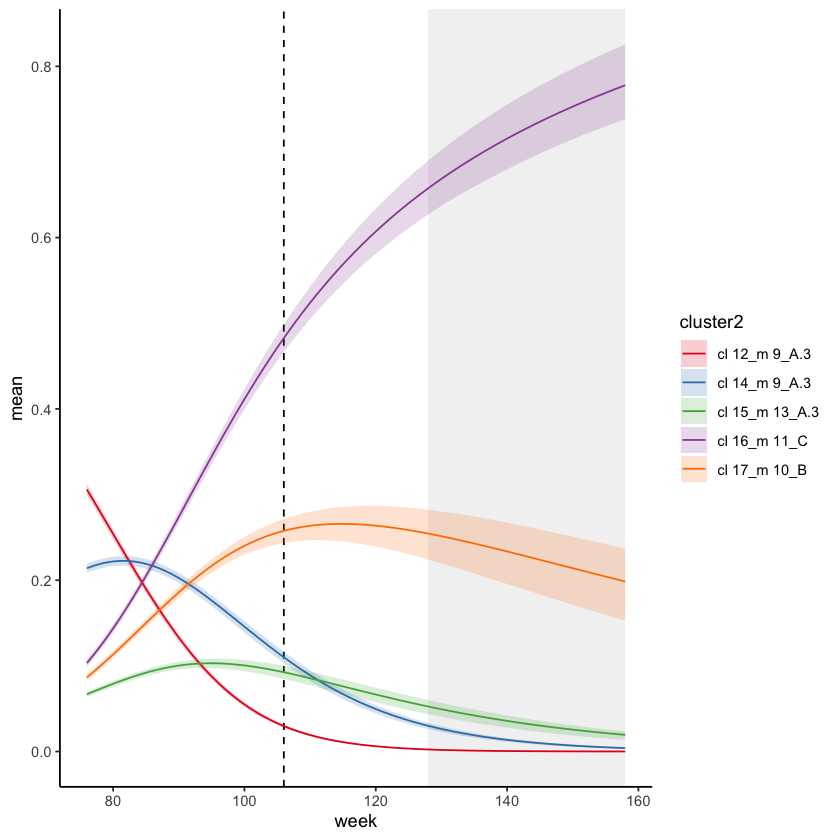

Warning message:
“Specifying width/height in layout() is now deprecated.
Please specify in ggplotly() or plot_ly()”
Warning message:
“Specifying width/height in layout() is now deprecated.
Please specify in ggplotly() or plot_ly()”
Warning message in RColorBrewer::brewer.pal(max(N, 3L), "Set2"):
“n too large, allowed maximum for palette Set2 is 8
Returning the palette you asked for with that many colors
”
Warning message in RColorBrewer::brewer.pal(max(N, 3L), "Set2"):
“n too large, allowed maximum for palette Set2 is 8
Returning the palette you asked for with that many colors
”
Warning message:
“Specifying width/height in layout() is now deprecated.
Please specify in ggplotly() or plot_ly()”
Warning message in RColorBrewer::brewer.pal(max(N, 3L), "Set2"):
“n too large, allowed maximum for palette Set2 is 8
Returning the palette you asked for with that many colors
”
Warning message in RColorBrewer::brewer.pal(max(N, 3L), "Set2"):
“n too large, allowed maximum for palette Set2 is 8
Retu

[1] "2015SH"


Warning message:
“Specifying width/height in layout() is now deprecated.
Please specify in ggplotly() or plot_ly()”
Warning message in RColorBrewer::brewer.pal(max(N, 3L), "Set2"):
“n too large, allowed maximum for palette Set2 is 8
Returning the palette you asked for with that many colors
”
Warning message in RColorBrewer::brewer.pal(max(N, 3L), "Set2"):
“n too large, allowed maximum for palette Set2 is 8
Returning the palette you asked for with that many colors
”


[1] "cl 2"
Running MCMC with 4 parallel chains...

Chain 1 Iteration:    1 / 2500 [  0%]  (Warmup) 
Chain 2 Iteration:    1 / 2500 [  0%]  (Warmup) 
Chain 3 Iteration:    1 / 2500 [  0%]  (Warmup) 
Chain 4 Iteration:    1 / 2500 [  0%]  (Warmup) 
Chain 2 Iteration:  100 / 2500 [  4%]  (Warmup) 
Chain 3 Iteration:  100 / 2500 [  4%]  (Warmup) 
Chain 4 Iteration:  100 / 2500 [  4%]  (Warmup) 
Chain 1 Iteration:  100 / 2500 [  4%]  (Warmup) 
Chain 4 Iteration:  200 / 2500 [  8%]  (Warmup) 
Chain 3 Iteration:  200 / 2500 [  8%]  (Warmup) 
Chain 2 Iteration:  200 / 2500 [  8%]  (Warmup) 
Chain 1 Iteration:  200 / 2500 [  8%]  (Warmup) 
Chain 4 Iteration:  300 / 2500 [ 12%]  (Warmup) 
Chain 3 Iteration:  300 / 2500 [ 12%]  (Warmup) 
Chain 2 Iteration:  300 / 2500 [ 12%]  (Warmup) 
Chain 4 Iteration:  400 / 2500 [ 16%]  (Warmup) 
Chain 1 Iteration:  300 / 2500 [ 12%]  (Warmup) 
Chain 3 Iteration:  400 / 2500 [ 16%]  (Warmup) 
Chain 1 Iteration:  400 / 2500 [ 16%]  (Warmup) 
Chain 2 Iteration:

`summarise()` has grouped output by 'metacluster', 'subclade'. You can override using the `.groups` argument.
Warning message:
“Removed 370 rows containing missing values or values outside the scale range (`geom_line()`).”
Warning message:
“Removed 370 rows containing missing values or values outside the scale range (`geom_line()`).”


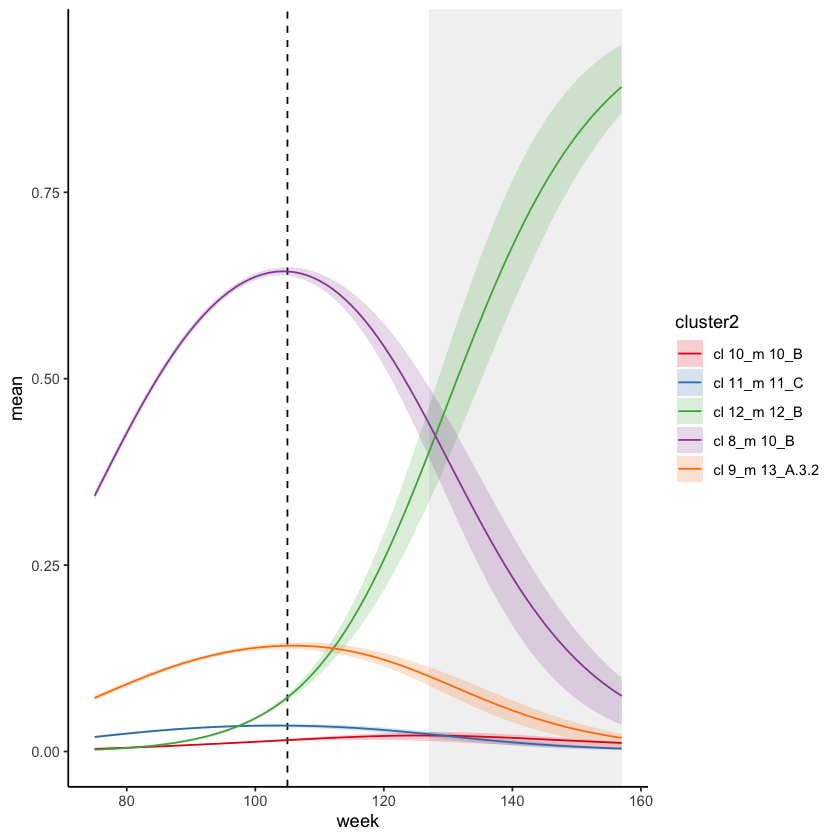

Warning message:
“Specifying width/height in layout() is now deprecated.
Please specify in ggplotly() or plot_ly()”
Warning message:
“Specifying width/height in layout() is now deprecated.
Please specify in ggplotly() or plot_ly()”
Warning message in RColorBrewer::brewer.pal(max(N, 3L), "Set2"):
“n too large, allowed maximum for palette Set2 is 8
Returning the palette you asked for with that many colors
”
Warning message in RColorBrewer::brewer.pal(max(N, 3L), "Set2"):
“n too large, allowed maximum for palette Set2 is 8
Returning the palette you asked for with that many colors
”
Warning message:
“Specifying width/height in layout() is now deprecated.
Please specify in ggplotly() or plot_ly()”
Warning message in RColorBrewer::brewer.pal(max(N, 3L), "Set2"):
“n too large, allowed maximum for palette Set2 is 8
Returning the palette you asked for with that many colors
”
Warning message in RColorBrewer::brewer.pal(max(N, 3L), "Set2"):
“n too large, allowed maximum for palette Set2 is 8
Retu

[1] "2015NH"


Warning message:
“Specifying width/height in layout() is now deprecated.
Please specify in ggplotly() or plot_ly()”
Warning message in RColorBrewer::brewer.pal(max(N, 3L), "Set2"):
“n too large, allowed maximum for palette Set2 is 8
Returning the palette you asked for with that many colors
”
Warning message in RColorBrewer::brewer.pal(max(N, 3L), "Set2"):
“n too large, allowed maximum for palette Set2 is 8
Returning the palette you asked for with that many colors
”


[1] "cl 5"
Running MCMC with 4 parallel chains...

Chain 1 Iteration:    1 / 2500 [  0%]  (Warmup) 
Chain 2 Iteration:    1 / 2500 [  0%]  (Warmup) 
Chain 3 Iteration:    1 / 2500 [  0%]  (Warmup) 
Chain 4 Iteration:    1 / 2500 [  0%]  (Warmup) 
Chain 1 Iteration:  100 / 2500 [  4%]  (Warmup) 
Chain 2 Iteration:  100 / 2500 [  4%]  (Warmup) 
Chain 3 Iteration:  100 / 2500 [  4%]  (Warmup) 
Chain 4 Iteration:  100 / 2500 [  4%]  (Warmup) 
Chain 1 Iteration:  200 / 2500 [  8%]  (Warmup) 
Chain 2 Iteration:  200 / 2500 [  8%]  (Warmup) 
Chain 3 Iteration:  200 / 2500 [  8%]  (Warmup) 
Chain 1 Iteration:  300 / 2500 [ 12%]  (Warmup) 
Chain 4 Iteration:  200 / 2500 [  8%]  (Warmup) 
Chain 2 Iteration:  300 / 2500 [ 12%]  (Warmup) 
Chain 3 Iteration:  300 / 2500 [ 12%]  (Warmup) 
Chain 1 Iteration:  400 / 2500 [ 16%]  (Warmup) 
Chain 2 Iteration:  400 / 2500 [ 16%]  (Warmup) 
Chain 4 Iteration:  300 / 2500 [ 12%]  (Warmup) 
Chain 3 Iteration:  400 / 2500 [ 16%]  (Warmup) 
Chain 1 Iteration:

`summarise()` has grouped output by 'metacluster', 'subclade'. You can override using the `.groups` argument.
Warning message:
“Removed 375 rows containing missing values or values outside the scale range (`geom_line()`).”
Warning message:
“Removed 375 rows containing missing values or values outside the scale range (`geom_line()`).”


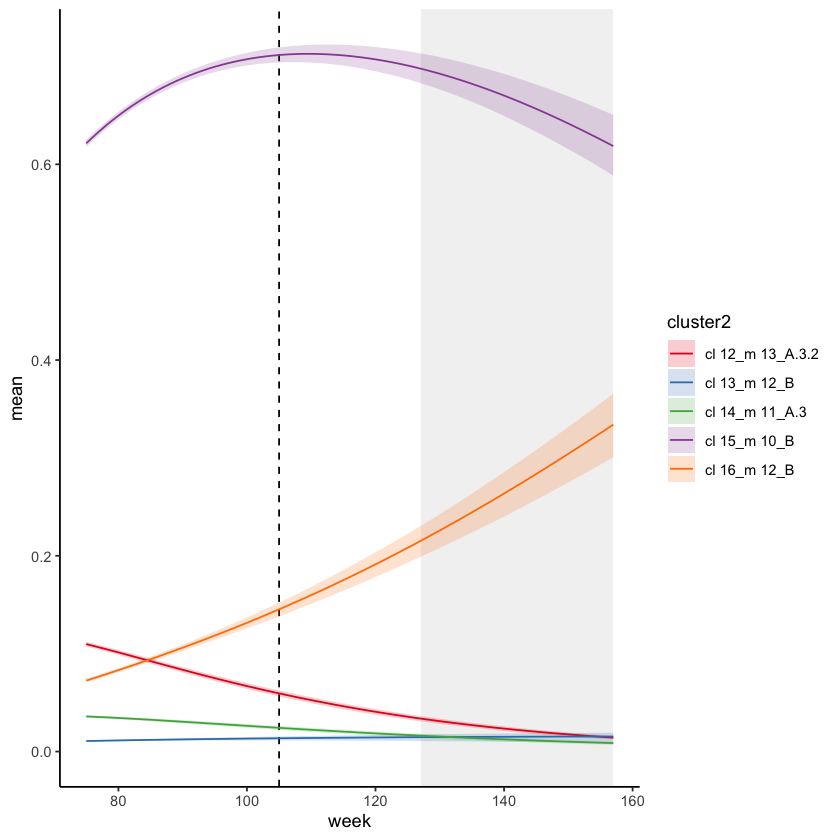

Warning message:
“Specifying width/height in layout() is now deprecated.
Please specify in ggplotly() or plot_ly()”
Warning message:
“Specifying width/height in layout() is now deprecated.
Please specify in ggplotly() or plot_ly()”
Warning message in RColorBrewer::brewer.pal(max(N, 3L), "Set2"):
“n too large, allowed maximum for palette Set2 is 8
Returning the palette you asked for with that many colors
”
Warning message in RColorBrewer::brewer.pal(max(N, 3L), "Set2"):
“n too large, allowed maximum for palette Set2 is 8
Returning the palette you asked for with that many colors
”
Warning message:
“Specifying width/height in layout() is now deprecated.
Please specify in ggplotly() or plot_ly()”
Warning message in RColorBrewer::brewer.pal(max(N, 3L), "Set2"):
“n too large, allowed maximum for palette Set2 is 8
Returning the palette you asked for with that many colors
”
Warning message in RColorBrewer::brewer.pal(max(N, 3L), "Set2"):
“n too large, allowed maximum for palette Set2 is 8
Retu

[1] "2016SH"


Warning message:
“Specifying width/height in layout() is now deprecated.
Please specify in ggplotly() or plot_ly()”
Warning message in RColorBrewer::brewer.pal(max(N, 3L), "Set2"):
“n too large, allowed maximum for palette Set2 is 8
Returning the palette you asked for with that many colors
”
Warning message in RColorBrewer::brewer.pal(max(N, 3L), "Set2"):
“n too large, allowed maximum for palette Set2 is 8
Returning the palette you asked for with that many colors
”


[1] "cl 6"
Running MCMC with 4 parallel chains...

Chain 1 Iteration:    1 / 2500 [  0%]  (Warmup) 
Chain 2 Iteration:    1 / 2500 [  0%]  (Warmup) 
Chain 3 Iteration:    1 / 2500 [  0%]  (Warmup) 
Chain 4 Iteration:    1 / 2500 [  0%]  (Warmup) 
Chain 1 Iteration:  100 / 2500 [  4%]  (Warmup) 
Chain 2 Iteration:  100 / 2500 [  4%]  (Warmup) 
Chain 3 Iteration:  100 / 2500 [  4%]  (Warmup) 
Chain 4 Iteration:  100 / 2500 [  4%]  (Warmup) 
Chain 3 Iteration:  200 / 2500 [  8%]  (Warmup) 
Chain 1 Iteration:  200 / 2500 [  8%]  (Warmup) 
Chain 2 Iteration:  200 / 2500 [  8%]  (Warmup) 
Chain 4 Iteration:  200 / 2500 [  8%]  (Warmup) 
Chain 3 Iteration:  300 / 2500 [ 12%]  (Warmup) 
Chain 1 Iteration:  300 / 2500 [ 12%]  (Warmup) 
Chain 2 Iteration:  300 / 2500 [ 12%]  (Warmup) 
Chain 4 Iteration:  300 / 2500 [ 12%]  (Warmup) 
Chain 1 Iteration:  400 / 2500 [ 16%]  (Warmup) 
Chain 2 Iteration:  400 / 2500 [ 16%]  (Warmup) 
Chain 3 Iteration:  400 / 2500 [ 16%]  (Warmup) 
Chain 4 Iteration:

`summarise()` has grouped output by 'metacluster', 'subclade'. You can override using the `.groups` argument.
Warning message:
“Removed 370 rows containing missing values or values outside the scale range (`geom_line()`).”
Warning message:
“Removed 370 rows containing missing values or values outside the scale range (`geom_line()`).”


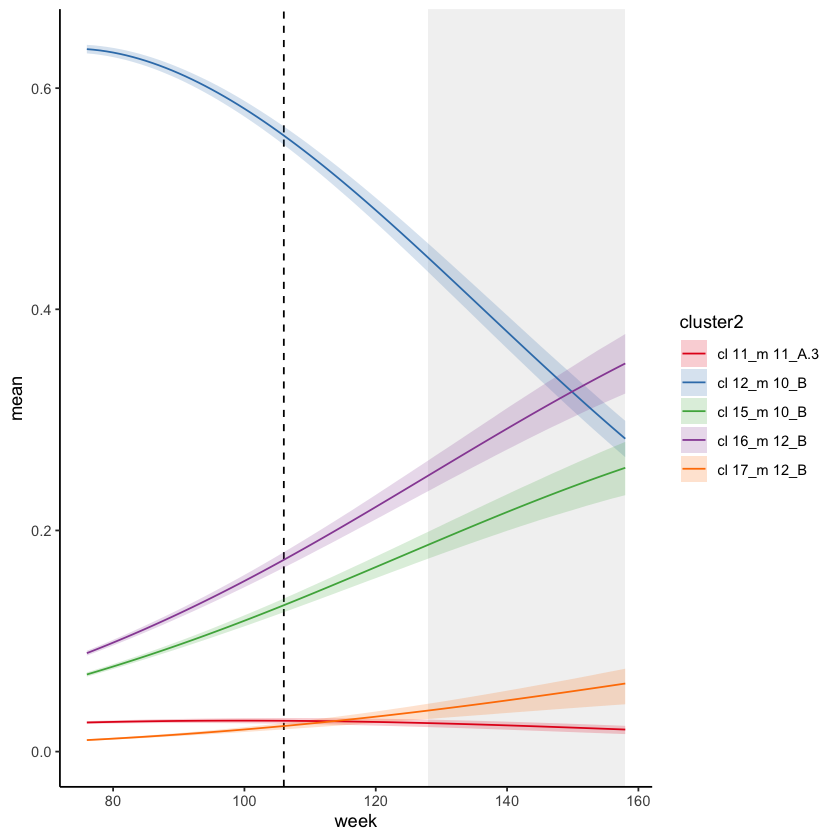

Warning message:
“Specifying width/height in layout() is now deprecated.
Please specify in ggplotly() or plot_ly()”
Warning message:
“Specifying width/height in layout() is now deprecated.
Please specify in ggplotly() or plot_ly()”
Warning message:
“Specifying width/height in layout() is now deprecated.
Please specify in ggplotly() or plot_ly()”
Warning message in RColorBrewer::brewer.pal(max(N, 3L), "Set2"):
“n too large, allowed maximum for palette Set2 is 8
Returning the palette you asked for with that many colors
”
Warning message in RColorBrewer::brewer.pal(max(N, 3L), "Set2"):
“n too large, allowed maximum for palette Set2 is 8
Returning the palette you asked for with that many colors
”


[1] "2016NH"


Warning message:
“Specifying width/height in layout() is now deprecated.
Please specify in ggplotly() or plot_ly()”
Warning message in RColorBrewer::brewer.pal(max(N, 3L), "Set2"):
“n too large, allowed maximum for palette Set2 is 8
Returning the palette you asked for with that many colors
”
Warning message in RColorBrewer::brewer.pal(max(N, 3L), "Set2"):
“n too large, allowed maximum for palette Set2 is 8
Returning the palette you asked for with that many colors
”


[1] "cl 3"
Running MCMC with 4 parallel chains...

Chain 1 Iteration:    1 / 2500 [  0%]  (Warmup) 
Chain 2 Iteration:    1 / 2500 [  0%]  (Warmup) 
Chain 3 Iteration:    1 / 2500 [  0%]  (Warmup) 
Chain 4 Iteration:    1 / 2500 [  0%]  (Warmup) 
Chain 4 Iteration:  100 / 2500 [  4%]  (Warmup) 
Chain 2 Iteration:  100 / 2500 [  4%]  (Warmup) 
Chain 3 Iteration:  100 / 2500 [  4%]  (Warmup) 
Chain 1 Iteration:  100 / 2500 [  4%]  (Warmup) 
Chain 4 Iteration:  200 / 2500 [  8%]  (Warmup) 
Chain 1 Iteration:  200 / 2500 [  8%]  (Warmup) 
Chain 2 Iteration:  200 / 2500 [  8%]  (Warmup) 
Chain 3 Iteration:  200 / 2500 [  8%]  (Warmup) 
Chain 1 Iteration:  300 / 2500 [ 12%]  (Warmup) 
Chain 4 Iteration:  300 / 2500 [ 12%]  (Warmup) 
Chain 2 Iteration:  300 / 2500 [ 12%]  (Warmup) 
Chain 3 Iteration:  300 / 2500 [ 12%]  (Warmup) 
Chain 4 Iteration:  400 / 2500 [ 16%]  (Warmup) 
Chain 1 Iteration:  400 / 2500 [ 16%]  (Warmup) 
Chain 2 Iteration:  400 / 2500 [ 16%]  (Warmup) 
Chain 3 Iteration:

`summarise()` has grouped output by 'metacluster', 'subclade'. You can override using the `.groups` argument.
Warning message:
“Removed 370 rows containing missing values or values outside the scale range (`geom_line()`).”
Warning message:
“Removed 370 rows containing missing values or values outside the scale range (`geom_line()`).”


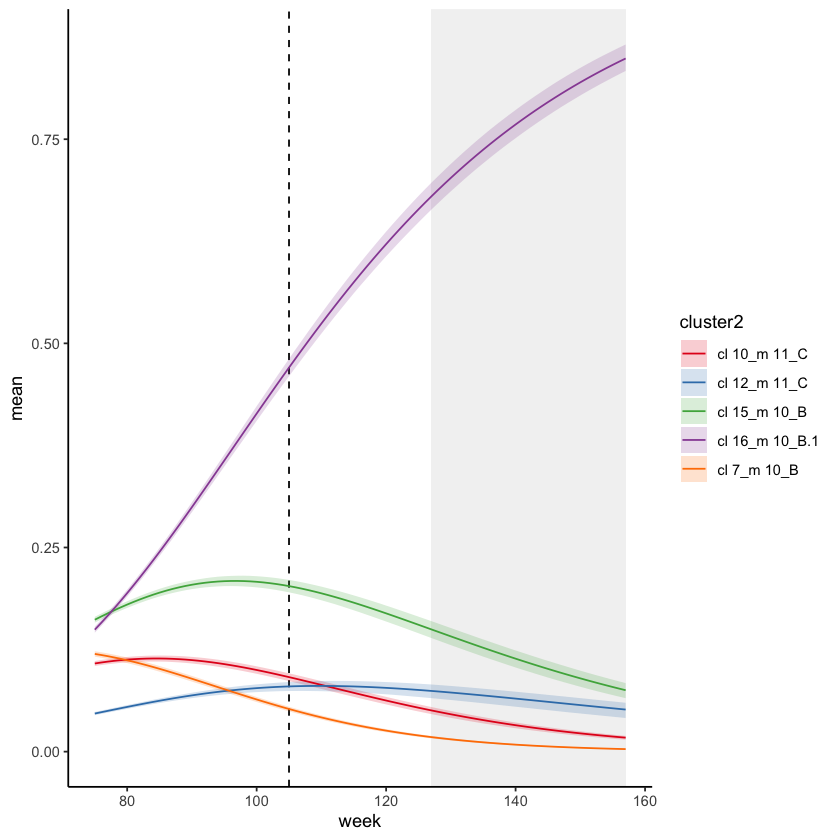

Warning message:
“Specifying width/height in layout() is now deprecated.
Please specify in ggplotly() or plot_ly()”
Warning message:
“Specifying width/height in layout() is now deprecated.
Please specify in ggplotly() or plot_ly()”
Warning message in RColorBrewer::brewer.pal(max(N, 3L), "Set2"):
“n too large, allowed maximum for palette Set2 is 8
Returning the palette you asked for with that many colors
”
Warning message in RColorBrewer::brewer.pal(max(N, 3L), "Set2"):
“n too large, allowed maximum for palette Set2 is 8
Returning the palette you asked for with that many colors
”
Warning message:
“Specifying width/height in layout() is now deprecated.
Please specify in ggplotly() or plot_ly()”
Warning message in RColorBrewer::brewer.pal(max(N, 3L), "Set2"):
“n too large, allowed maximum for palette Set2 is 8
Returning the palette you asked for with that many colors
”
Warning message in RColorBrewer::brewer.pal(max(N, 3L), "Set2"):
“n too large, allowed maximum for palette Set2 is 8
Retu

[1] "2017SH"


Warning message:
“Specifying width/height in layout() is now deprecated.
Please specify in ggplotly() or plot_ly()”
Warning message in RColorBrewer::brewer.pal(max(N, 3L), "Set2"):
“n too large, allowed maximum for palette Set2 is 8
Returning the palette you asked for with that many colors
”
Warning message in RColorBrewer::brewer.pal(max(N, 3L), "Set2"):
“n too large, allowed maximum for palette Set2 is 8
Returning the palette you asked for with that many colors
”


[1] "cl 1"
Running MCMC with 4 parallel chains...

Chain 1 Iteration:    1 / 2500 [  0%]  (Warmup) 
Chain 2 Iteration:    1 / 2500 [  0%]  (Warmup) 
Chain 3 Iteration:    1 / 2500 [  0%]  (Warmup) 
Chain 4 Iteration:    1 / 2500 [  0%]  (Warmup) 
Chain 1 Iteration:  100 / 2500 [  4%]  (Warmup) 
Chain 2 Iteration:  100 / 2500 [  4%]  (Warmup) 
Chain 3 Iteration:  100 / 2500 [  4%]  (Warmup) 
Chain 4 Iteration:  100 / 2500 [  4%]  (Warmup) 
Chain 2 Iteration:  200 / 2500 [  8%]  (Warmup) 
Chain 1 Iteration:  200 / 2500 [  8%]  (Warmup) 
Chain 3 Iteration:  200 / 2500 [  8%]  (Warmup) 
Chain 4 Iteration:  200 / 2500 [  8%]  (Warmup) 
Chain 2 Iteration:  300 / 2500 [ 12%]  (Warmup) 
Chain 1 Iteration:  300 / 2500 [ 12%]  (Warmup) 
Chain 3 Iteration:  300 / 2500 [ 12%]  (Warmup) 
Chain 4 Iteration:  300 / 2500 [ 12%]  (Warmup) 
Chain 2 Iteration:  400 / 2500 [ 16%]  (Warmup) 
Chain 1 Iteration:  400 / 2500 [ 16%]  (Warmup) 
Chain 3 Iteration:  400 / 2500 [ 16%]  (Warmup) 
Chain 4 Iteration:

`summarise()` has grouped output by 'metacluster', 'subclade'. You can override using the `.groups` argument.
Warning message:
“Removed 370 rows containing missing values or values outside the scale range (`geom_line()`).”
Warning message:
“Removed 370 rows containing missing values or values outside the scale range (`geom_line()`).”


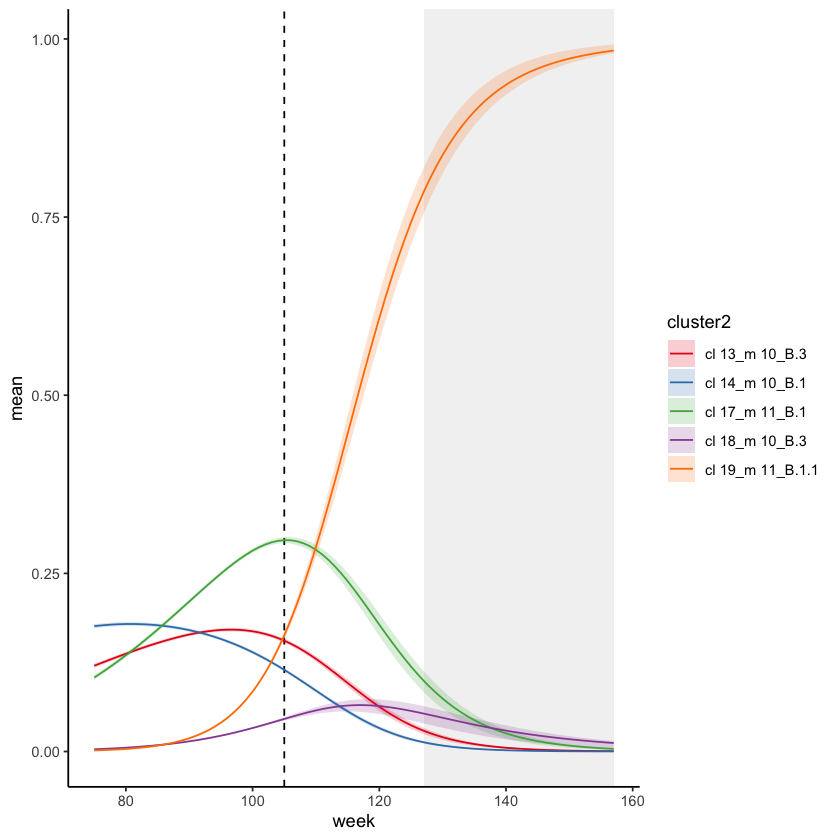

Warning message:
“Specifying width/height in layout() is now deprecated.
Please specify in ggplotly() or plot_ly()”
Warning message:
“Specifying width/height in layout() is now deprecated.
Please specify in ggplotly() or plot_ly()”
Warning message in RColorBrewer::brewer.pal(max(N, 3L), "Set2"):
“n too large, allowed maximum for palette Set2 is 8
Returning the palette you asked for with that many colors
”
Warning message in RColorBrewer::brewer.pal(max(N, 3L), "Set2"):
“n too large, allowed maximum for palette Set2 is 8
Returning the palette you asked for with that many colors
”
Warning message:
“Specifying width/height in layout() is now deprecated.
Please specify in ggplotly() or plot_ly()”
Warning message in RColorBrewer::brewer.pal(max(N, 3L), "Set2"):
“n too large, allowed maximum for palette Set2 is 8
Returning the palette you asked for with that many colors
”
Warning message in RColorBrewer::brewer.pal(max(N, 3L), "Set2"):
“n too large, allowed maximum for palette Set2 is 8
Retu

[1] "2017NH"


Warning message:
“Specifying width/height in layout() is now deprecated.
Please specify in ggplotly() or plot_ly()”
Warning message in RColorBrewer::brewer.pal(max(N, 3L), "Set2"):
“n too large, allowed maximum for palette Set2 is 8
Returning the palette you asked for with that many colors
”
Warning message in RColorBrewer::brewer.pal(max(N, 3L), "Set2"):
“n too large, allowed maximum for palette Set2 is 8
Returning the palette you asked for with that many colors
”


[1] "cl 3"
Running MCMC with 4 parallel chains...

Chain 1 Iteration:    1 / 2500 [  0%]  (Warmup) 
Chain 2 Iteration:    1 / 2500 [  0%]  (Warmup) 
Chain 3 Iteration:    1 / 2500 [  0%]  (Warmup) 
Chain 4 Iteration:    1 / 2500 [  0%]  (Warmup) 
Chain 1 Iteration:  100 / 2500 [  4%]  (Warmup) 
Chain 2 Iteration:  100 / 2500 [  4%]  (Warmup) 
Chain 4 Iteration:  100 / 2500 [  4%]  (Warmup) 
Chain 3 Iteration:  100 / 2500 [  4%]  (Warmup) 
Chain 1 Iteration:  200 / 2500 [  8%]  (Warmup) 
Chain 2 Iteration:  200 / 2500 [  8%]  (Warmup) 
Chain 4 Iteration:  200 / 2500 [  8%]  (Warmup) 
Chain 3 Iteration:  200 / 2500 [  8%]  (Warmup) 
Chain 1 Iteration:  300 / 2500 [ 12%]  (Warmup) 
Chain 2 Iteration:  300 / 2500 [ 12%]  (Warmup) 
Chain 4 Iteration:  300 / 2500 [ 12%]  (Warmup) 
Chain 3 Iteration:  300 / 2500 [ 12%]  (Warmup) 
Chain 1 Iteration:  400 / 2500 [ 16%]  (Warmup) 
Chain 2 Iteration:  400 / 2500 [ 16%]  (Warmup) 
Chain 4 Iteration:  400 / 2500 [ 16%]  (Warmup) 
Chain 3 Iteration:

`summarise()` has grouped output by 'metacluster', 'subclade'. You can override using the `.groups` argument.
Warning message:
“Removed 370 rows containing missing values or values outside the scale range (`geom_line()`).”
Warning message:
“Removed 370 rows containing missing values or values outside the scale range (`geom_line()`).”


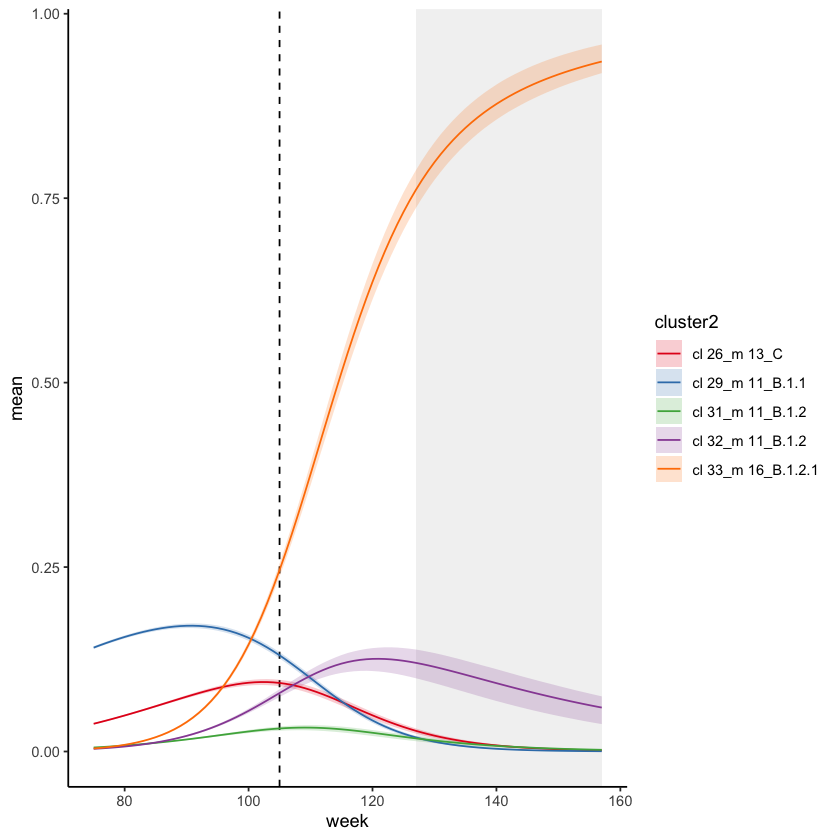

Warning message:
“Specifying width/height in layout() is now deprecated.
Please specify in ggplotly() or plot_ly()”
Warning message:
“Specifying width/height in layout() is now deprecated.
Please specify in ggplotly() or plot_ly()”
Warning message in RColorBrewer::brewer.pal(max(N, 3L), "Set2"):
“n too large, allowed maximum for palette Set2 is 8
Returning the palette you asked for with that many colors
”
Warning message in RColorBrewer::brewer.pal(max(N, 3L), "Set2"):
“n too large, allowed maximum for palette Set2 is 8
Returning the palette you asked for with that many colors
”
Warning message:
“Specifying width/height in layout() is now deprecated.
Please specify in ggplotly() or plot_ly()”
Warning message in RColorBrewer::brewer.pal(max(N, 3L), "Set2"):
“n too large, allowed maximum for palette Set2 is 8
Returning the palette you asked for with that many colors
”
Warning message in RColorBrewer::brewer.pal(max(N, 3L), "Set2"):
“n too large, allowed maximum for palette Set2 is 8
Retu

[1] "2018SH"


Warning message:
“Specifying width/height in layout() is now deprecated.
Please specify in ggplotly() or plot_ly()”
Warning message in RColorBrewer::brewer.pal(max(N, 3L), "Set2"):
“n too large, allowed maximum for palette Set2 is 8
Returning the palette you asked for with that many colors
”
Warning message in RColorBrewer::brewer.pal(max(N, 3L), "Set2"):
“n too large, allowed maximum for palette Set2 is 8
Returning the palette you asked for with that many colors
”


[1] "cl 6"
Running MCMC with 4 parallel chains...

Chain 1 Iteration:    1 / 2500 [  0%]  (Warmup) 
Chain 2 Iteration:    1 / 2500 [  0%]  (Warmup) 
Chain 3 Iteration:    1 / 2500 [  0%]  (Warmup) 
Chain 4 Iteration:    1 / 2500 [  0%]  (Warmup) 
Chain 4 Iteration:  100 / 2500 [  4%]  (Warmup) 
Chain 1 Iteration:  100 / 2500 [  4%]  (Warmup) 
Chain 2 Iteration:  100 / 2500 [  4%]  (Warmup) 
Chain 3 Iteration:  100 / 2500 [  4%]  (Warmup) 
Chain 1 Iteration:  200 / 2500 [  8%]  (Warmup) 
Chain 2 Iteration:  200 / 2500 [  8%]  (Warmup) 
Chain 3 Iteration:  200 / 2500 [  8%]  (Warmup) 
Chain 4 Iteration:  200 / 2500 [  8%]  (Warmup) 
Chain 2 Iteration:  300 / 2500 [ 12%]  (Warmup) 
Chain 1 Iteration:  300 / 2500 [ 12%]  (Warmup) 
Chain 3 Iteration:  300 / 2500 [ 12%]  (Warmup) 
Chain 4 Iteration:  300 / 2500 [ 12%]  (Warmup) 
Chain 2 Iteration:  400 / 2500 [ 16%]  (Warmup) 
Chain 1 Iteration:  400 / 2500 [ 16%]  (Warmup) 
Chain 3 Iteration:  400 / 2500 [ 16%]  (Warmup) 
Chain 4 Iteration:

`summarise()` has grouped output by 'metacluster', 'subclade'. You can override using the `.groups` argument.
Warning message:
“Removed 370 rows containing missing values or values outside the scale range (`geom_line()`).”
Warning message:
“Removed 370 rows containing missing values or values outside the scale range (`geom_line()`).”


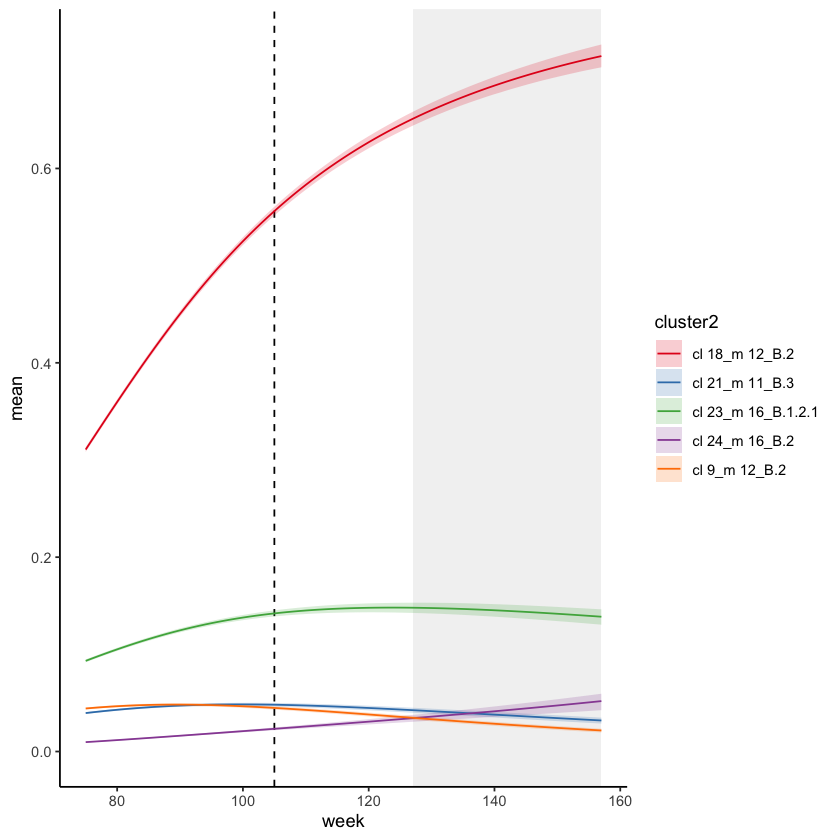

Warning message:
“Specifying width/height in layout() is now deprecated.
Please specify in ggplotly() or plot_ly()”
Warning message:
“Specifying width/height in layout() is now deprecated.
Please specify in ggplotly() or plot_ly()”
Warning message in RColorBrewer::brewer.pal(max(N, 3L), "Set2"):
“n too large, allowed maximum for palette Set2 is 8
Returning the palette you asked for with that many colors
”
Warning message in RColorBrewer::brewer.pal(max(N, 3L), "Set2"):
“n too large, allowed maximum for palette Set2 is 8
Returning the palette you asked for with that many colors
”
Warning message:
“Specifying width/height in layout() is now deprecated.
Please specify in ggplotly() or plot_ly()”
Warning message in RColorBrewer::brewer.pal(max(N, 3L), "Set2"):
“n too large, allowed maximum for palette Set2 is 8
Returning the palette you asked for with that many colors
”
Warning message in RColorBrewer::brewer.pal(max(N, 3L), "Set2"):
“n too large, allowed maximum for palette Set2 is 8
Retu

[1] "2018NH"


Warning message:
“Specifying width/height in layout() is now deprecated.
Please specify in ggplotly() or plot_ly()”
Warning message in RColorBrewer::brewer.pal(max(N, 3L), "Set2"):
“n too large, allowed maximum for palette Set2 is 8
Returning the palette you asked for with that many colors
”
Warning message in RColorBrewer::brewer.pal(max(N, 3L), "Set2"):
“n too large, allowed maximum for palette Set2 is 8
Returning the palette you asked for with that many colors
”


[1] "cl 17"
Running MCMC with 4 parallel chains...

Chain 1 Iteration:    1 / 2500 [  0%]  (Warmup) 
Chain 2 Iteration:    1 / 2500 [  0%]  (Warmup) 
Chain 3 Iteration:    1 / 2500 [  0%]  (Warmup) 
Chain 4 Iteration:    1 / 2500 [  0%]  (Warmup) 
Chain 4 Iteration:  100 / 2500 [  4%]  (Warmup) 
Chain 1 Iteration:  100 / 2500 [  4%]  (Warmup) 
Chain 2 Iteration:  100 / 2500 [  4%]  (Warmup) 
Chain 3 Iteration:  100 / 2500 [  4%]  (Warmup) 
Chain 1 Iteration:  200 / 2500 [  8%]  (Warmup) 
Chain 4 Iteration:  200 / 2500 [  8%]  (Warmup) 
Chain 2 Iteration:  200 / 2500 [  8%]  (Warmup) 
Chain 3 Iteration:  200 / 2500 [  8%]  (Warmup) 
Chain 2 Iteration:  300 / 2500 [ 12%]  (Warmup) 
Chain 4 Iteration:  300 / 2500 [ 12%]  (Warmup) 
Chain 1 Iteration:  300 / 2500 [ 12%]  (Warmup) 
Chain 3 Iteration:  300 / 2500 [ 12%]  (Warmup) 
Chain 2 Iteration:  400 / 2500 [ 16%]  (Warmup) 
Chain 4 Iteration:  400 / 2500 [ 16%]  (Warmup) 
Chain 1 Iteration:  400 / 2500 [ 16%]  (Warmup) 
Chain 3 Iteration

`summarise()` has grouped output by 'metacluster', 'subclade'. You can override using the `.groups` argument.
Warning message:
“Removed 370 rows containing missing values or values outside the scale range (`geom_line()`).”
Warning message:
“Removed 370 rows containing missing values or values outside the scale range (`geom_line()`).”


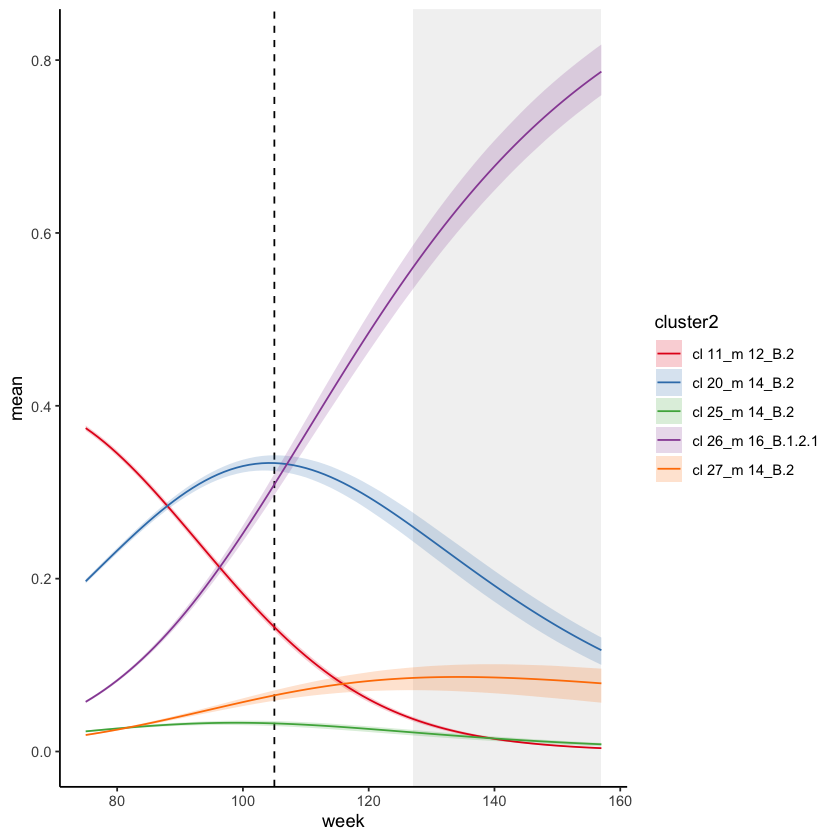

Warning message:
“Specifying width/height in layout() is now deprecated.
Please specify in ggplotly() or plot_ly()”
Warning message:
“Specifying width/height in layout() is now deprecated.
Please specify in ggplotly() or plot_ly()”
Warning message:
“Specifying width/height in layout() is now deprecated.
Please specify in ggplotly() or plot_ly()”
Warning message in RColorBrewer::brewer.pal(max(N, 3L), "Set2"):
“n too large, allowed maximum for palette Set2 is 8
Returning the palette you asked for with that many colors
”
Warning message in RColorBrewer::brewer.pal(max(N, 3L), "Set2"):
“n too large, allowed maximum for palette Set2 is 8
Returning the palette you asked for with that many colors
”


[1] "2019SH"


Warning message:
“Specifying width/height in layout() is now deprecated.
Please specify in ggplotly() or plot_ly()”
Warning message in RColorBrewer::brewer.pal(max(N, 3L), "Set2"):
“n too large, allowed maximum for palette Set2 is 8
Returning the palette you asked for with that many colors
”
Warning message in RColorBrewer::brewer.pal(max(N, 3L), "Set2"):
“n too large, allowed maximum for palette Set2 is 8
Returning the palette you asked for with that many colors
”


[1] "cl 6"
Running MCMC with 4 parallel chains...

Chain 1 Iteration:    1 / 2500 [  0%]  (Warmup) 
Chain 2 Iteration:    1 / 2500 [  0%]  (Warmup) 
Chain 3 Iteration:    1 / 2500 [  0%]  (Warmup) 
Chain 4 Iteration:    1 / 2500 [  0%]  (Warmup) 
Chain 1 Iteration:  100 / 2500 [  4%]  (Warmup) 
Chain 2 Iteration:  100 / 2500 [  4%]  (Warmup) 
Chain 3 Iteration:  100 / 2500 [  4%]  (Warmup) 
Chain 4 Iteration:  100 / 2500 [  4%]  (Warmup) 
Chain 2 Iteration:  200 / 2500 [  8%]  (Warmup) 
Chain 1 Iteration:  200 / 2500 [  8%]  (Warmup) 
Chain 4 Iteration:  200 / 2500 [  8%]  (Warmup) 
Chain 2 Iteration:  300 / 2500 [ 12%]  (Warmup) 
Chain 3 Iteration:  200 / 2500 [  8%]  (Warmup) 
Chain 1 Iteration:  300 / 2500 [ 12%]  (Warmup) 
Chain 4 Iteration:  300 / 2500 [ 12%]  (Warmup) 
Chain 2 Iteration:  400 / 2500 [ 16%]  (Warmup) 
Chain 3 Iteration:  300 / 2500 [ 12%]  (Warmup) 
Chain 1 Iteration:  400 / 2500 [ 16%]  (Warmup) 
Chain 4 Iteration:  400 / 2500 [ 16%]  (Warmup) 
Chain 3 Iteration:

`summarise()` has grouped output by 'metacluster', 'subclade'. You can override using the `.groups` argument.
Warning message:
“Removed 370 rows containing missing values or values outside the scale range (`geom_line()`).”
Warning message:
“Removed 370 rows containing missing values or values outside the scale range (`geom_line()`).”


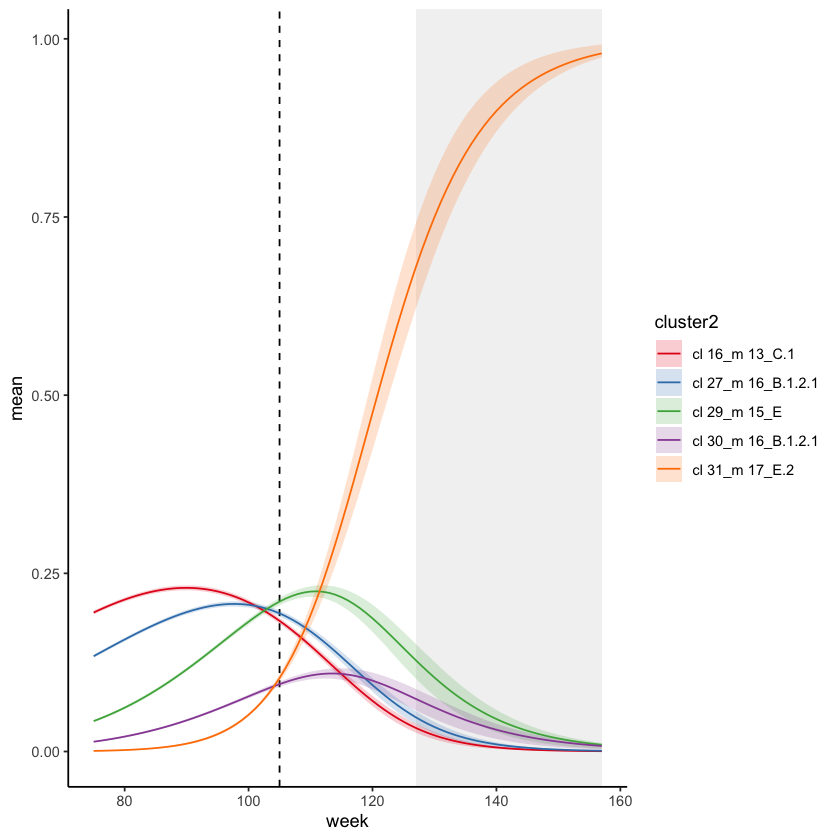

Warning message:
“Specifying width/height in layout() is now deprecated.
Please specify in ggplotly() or plot_ly()”
Warning message:
“Specifying width/height in layout() is now deprecated.
Please specify in ggplotly() or plot_ly()”
Warning message in RColorBrewer::brewer.pal(max(N, 3L), "Set2"):
“n too large, allowed maximum for palette Set2 is 8
Returning the palette you asked for with that many colors
”
Warning message in RColorBrewer::brewer.pal(max(N, 3L), "Set2"):
“n too large, allowed maximum for palette Set2 is 8
Returning the palette you asked for with that many colors
”
Warning message:
“Specifying width/height in layout() is now deprecated.
Please specify in ggplotly() or plot_ly()”
Warning message in RColorBrewer::brewer.pal(max(N, 3L), "Set2"):
“n too large, allowed maximum for palette Set2 is 8
Returning the palette you asked for with that many colors
”
Warning message in RColorBrewer::brewer.pal(max(N, 3L), "Set2"):
“n too large, allowed maximum for palette Set2 is 8
Retu

[1] "2019NH"


Warning message:
“Specifying width/height in layout() is now deprecated.
Please specify in ggplotly() or plot_ly()”
Warning message in RColorBrewer::brewer.pal(max(N, 3L), "Set2"):
“n too large, allowed maximum for palette Set2 is 8
Returning the palette you asked for with that many colors
”
Warning message in RColorBrewer::brewer.pal(max(N, 3L), "Set2"):
“n too large, allowed maximum for palette Set2 is 8
Returning the palette you asked for with that many colors
”


[1] "cl 2"
Running MCMC with 4 parallel chains...

Chain 1 Iteration:    1 / 2500 [  0%]  (Warmup) 
Chain 2 Iteration:    1 / 2500 [  0%]  (Warmup) 
Chain 3 Iteration:    1 / 2500 [  0%]  (Warmup) 
Chain 4 Iteration:    1 / 2500 [  0%]  (Warmup) 
Chain 4 Iteration:  100 / 2500 [  4%]  (Warmup) 
Chain 1 Iteration:  100 / 2500 [  4%]  (Warmup) 
Chain 3 Iteration:  100 / 2500 [  4%]  (Warmup) 
Chain 2 Iteration:  100 / 2500 [  4%]  (Warmup) 
Chain 4 Iteration:  200 / 2500 [  8%]  (Warmup) 
Chain 1 Iteration:  200 / 2500 [  8%]  (Warmup) 
Chain 2 Iteration:  200 / 2500 [  8%]  (Warmup) 
Chain 3 Iteration:  200 / 2500 [  8%]  (Warmup) 
Chain 4 Iteration:  300 / 2500 [ 12%]  (Warmup) 
Chain 1 Iteration:  300 / 2500 [ 12%]  (Warmup) 
Chain 2 Iteration:  300 / 2500 [ 12%]  (Warmup) 
Chain 4 Iteration:  400 / 2500 [ 16%]  (Warmup) 
Chain 3 Iteration:  300 / 2500 [ 12%]  (Warmup) 
Chain 1 Iteration:  400 / 2500 [ 16%]  (Warmup) 
Chain 2 Iteration:  400 / 2500 [ 16%]  (Warmup) 
Chain 4 Iteration:

`summarise()` has grouped output by 'metacluster', 'subclade'. You can override using the `.groups` argument.
Warning message:
“Removed 370 rows containing missing values or values outside the scale range (`geom_line()`).”
Warning message:
“Removed 370 rows containing missing values or values outside the scale range (`geom_line()`).”


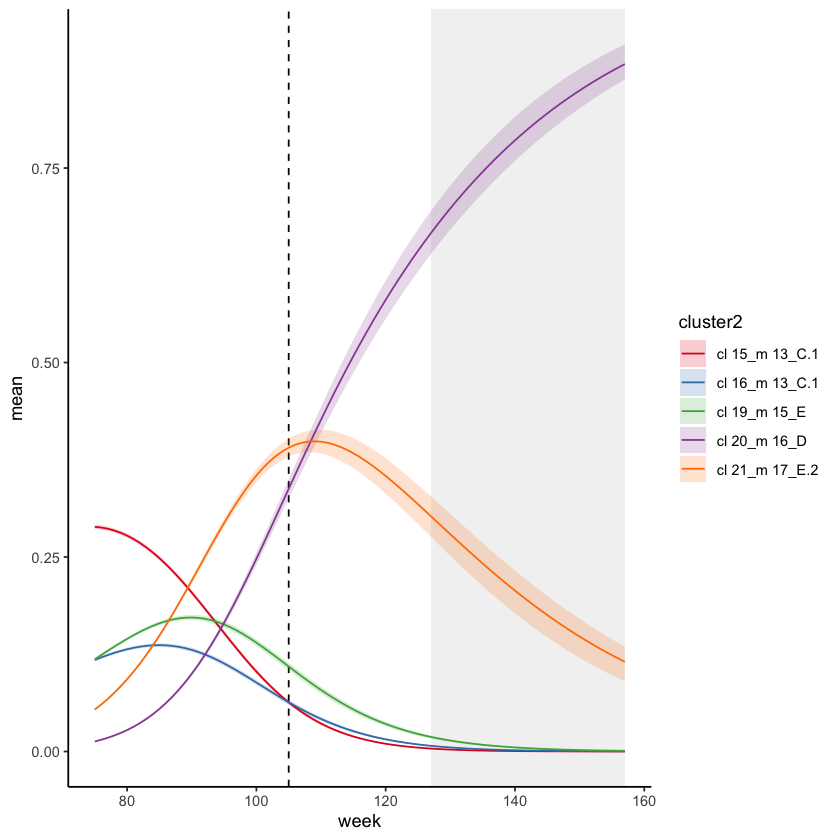

Warning message:
“Specifying width/height in layout() is now deprecated.
Please specify in ggplotly() or plot_ly()”
Warning message:
“Specifying width/height in layout() is now deprecated.
Please specify in ggplotly() or plot_ly()”
Warning message in RColorBrewer::brewer.pal(max(N, 3L), "Set2"):
“n too large, allowed maximum for palette Set2 is 8
Returning the palette you asked for with that many colors
”
Warning message in RColorBrewer::brewer.pal(max(N, 3L), "Set2"):
“n too large, allowed maximum for palette Set2 is 8
Returning the palette you asked for with that many colors
”
Warning message:
“Specifying width/height in layout() is now deprecated.
Please specify in ggplotly() or plot_ly()”
Warning message in RColorBrewer::brewer.pal(max(N, 3L), "Set2"):
“n too large, allowed maximum for palette Set2 is 8
Returning the palette you asked for with that many colors
”
Warning message in RColorBrewer::brewer.pal(max(N, 3L), "Set2"):
“n too large, allowed maximum for palette Set2 is 8
Retu

[1] "2020SH"


Warning message:
“Specifying width/height in layout() is now deprecated.
Please specify in ggplotly() or plot_ly()”
Warning message in RColorBrewer::brewer.pal(max(N, 3L), "Set2"):
“n too large, allowed maximum for palette Set2 is 8
Returning the palette you asked for with that many colors
”
Warning message in RColorBrewer::brewer.pal(max(N, 3L), "Set2"):
“n too large, allowed maximum for palette Set2 is 8
Returning the palette you asked for with that many colors
”


[1] "cl 8"
Running MCMC with 4 parallel chains...

Chain 1 Iteration:    1 / 2500 [  0%]  (Warmup) 
Chain 2 Iteration:    1 / 2500 [  0%]  (Warmup) 
Chain 3 Iteration:    1 / 2500 [  0%]  (Warmup) 
Chain 4 Iteration:    1 / 2500 [  0%]  (Warmup) 
Chain 2 Iteration:  100 / 2500 [  4%]  (Warmup) 
Chain 1 Iteration:  100 / 2500 [  4%]  (Warmup) 
Chain 3 Iteration:  100 / 2500 [  4%]  (Warmup) 
Chain 4 Iteration:  100 / 2500 [  4%]  (Warmup) 
Chain 1 Iteration:  200 / 2500 [  8%]  (Warmup) 
Chain 2 Iteration:  200 / 2500 [  8%]  (Warmup) 
Chain 3 Iteration:  200 / 2500 [  8%]  (Warmup) 
Chain 4 Iteration:  200 / 2500 [  8%]  (Warmup) 
Chain 1 Iteration:  300 / 2500 [ 12%]  (Warmup) 
Chain 2 Iteration:  300 / 2500 [ 12%]  (Warmup) 
Chain 1 Iteration:  400 / 2500 [ 16%]  (Warmup) 
Chain 3 Iteration:  300 / 2500 [ 12%]  (Warmup) 
Chain 4 Iteration:  300 / 2500 [ 12%]  (Warmup) 
Chain 2 Iteration:  400 / 2500 [ 16%]  (Warmup) 
Chain 1 Iteration:  500 / 2500 [ 20%]  (Warmup) 
Chain 1 Iteration:

`summarise()` has grouped output by 'metacluster', 'subclade'. You can override using the `.groups` argument.
Warning message:
“Removed 335 rows containing missing values or values outside the scale range (`geom_line()`).”
Warning message:
“Removed 335 rows containing missing values or values outside the scale range (`geom_line()`).”


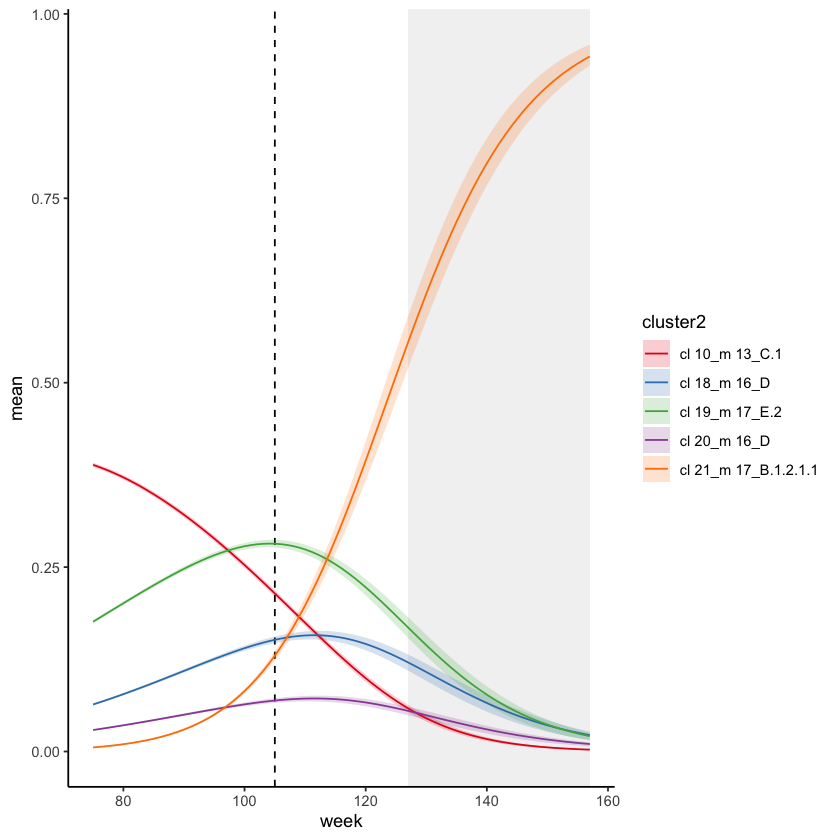

Warning message:
“Specifying width/height in layout() is now deprecated.
Please specify in ggplotly() or plot_ly()”
Warning message:
“Specifying width/height in layout() is now deprecated.
Please specify in ggplotly() or plot_ly()”
Warning message in RColorBrewer::brewer.pal(max(N, 3L), "Set2"):
“n too large, allowed maximum for palette Set2 is 8
Returning the palette you asked for with that many colors
”
Warning message in RColorBrewer::brewer.pal(max(N, 3L), "Set2"):
“n too large, allowed maximum for palette Set2 is 8
Returning the palette you asked for with that many colors
”
Warning message:
“Specifying width/height in layout() is now deprecated.
Please specify in ggplotly() or plot_ly()”
Warning message in RColorBrewer::brewer.pal(max(N, 3L), "Set2"):
“n too large, allowed maximum for palette Set2 is 8
Returning the palette you asked for with that many colors
”
Warning message in RColorBrewer::brewer.pal(max(N, 3L), "Set2"):
“n too large, allowed maximum for palette Set2 is 8
Retu

[1] "2020NH"


Warning message:
“Specifying width/height in layout() is now deprecated.
Please specify in ggplotly() or plot_ly()”
Warning message in RColorBrewer::brewer.pal(max(N, 3L), "Set2"):
“n too large, allowed maximum for palette Set2 is 8
Returning the palette you asked for with that many colors
”
Warning message in RColorBrewer::brewer.pal(max(N, 3L), "Set2"):
“n too large, allowed maximum for palette Set2 is 8
Returning the palette you asked for with that many colors
”


[1] "cl 6"
Running MCMC with 4 parallel chains...

Chain 1 Iteration:    1 / 2500 [  0%]  (Warmup) 
Chain 2 Iteration:    1 / 2500 [  0%]  (Warmup) 
Chain 3 Iteration:    1 / 2500 [  0%]  (Warmup) 
Chain 4 Iteration:    1 / 2500 [  0%]  (Warmup) 
Chain 2 Iteration:  100 / 2500 [  4%]  (Warmup) 
Chain 3 Iteration:  100 / 2500 [  4%]  (Warmup) 
Chain 4 Iteration:  100 / 2500 [  4%]  (Warmup) 
Chain 1 Iteration:  100 / 2500 [  4%]  (Warmup) 
Chain 3 Iteration:  200 / 2500 [  8%]  (Warmup) 
Chain 2 Iteration:  200 / 2500 [  8%]  (Warmup) 
Chain 4 Iteration:  200 / 2500 [  8%]  (Warmup) 
Chain 1 Iteration:  200 / 2500 [  8%]  (Warmup) 
Chain 2 Iteration:  300 / 2500 [ 12%]  (Warmup) 
Chain 3 Iteration:  300 / 2500 [ 12%]  (Warmup) 
Chain 1 Iteration:  300 / 2500 [ 12%]  (Warmup) 
Chain 4 Iteration:  300 / 2500 [ 12%]  (Warmup) 
Chain 2 Iteration:  400 / 2500 [ 16%]  (Warmup) 
Chain 3 Iteration:  400 / 2500 [ 16%]  (Warmup) 
Chain 1 Iteration:  400 / 2500 [ 16%]  (Warmup) 
Chain 4 Iteration:

`summarise()` has grouped output by 'metacluster', 'subclade'. You can override using the `.groups` argument.
Warning message:
“Removed 330 rows containing missing values or values outside the scale range (`geom_line()`).”
Warning message:
“Removed 330 rows containing missing values or values outside the scale range (`geom_line()`).”


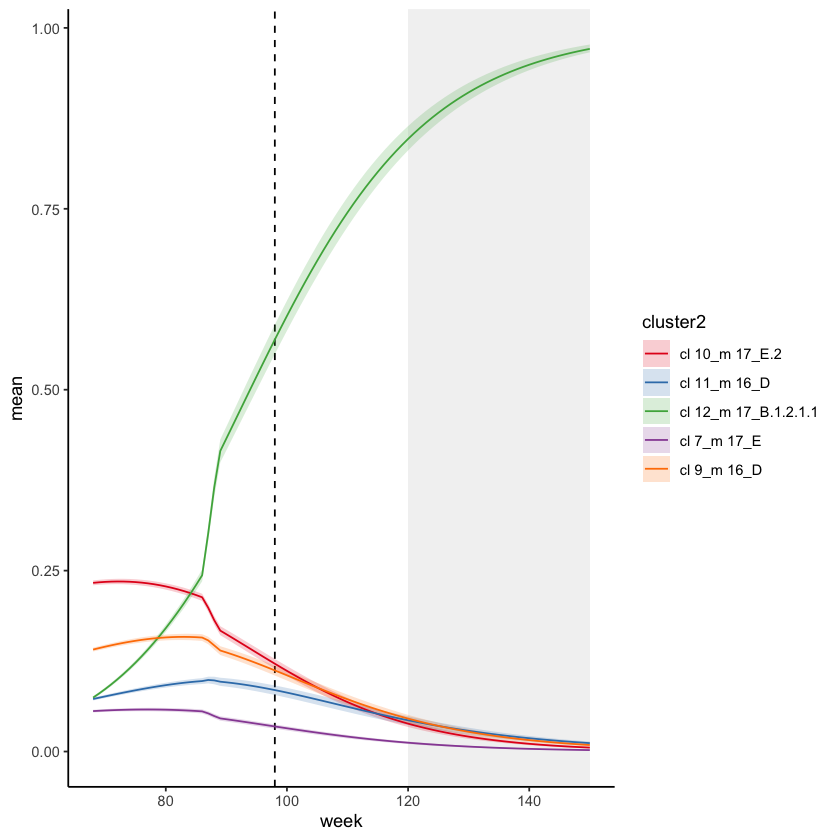

Warning message:
“Specifying width/height in layout() is now deprecated.
Please specify in ggplotly() or plot_ly()”
Warning message:
“Specifying width/height in layout() is now deprecated.
Please specify in ggplotly() or plot_ly()”
Warning message in RColorBrewer::brewer.pal(max(N, 3L), "Set2"):
“n too large, allowed maximum for palette Set2 is 8
Returning the palette you asked for with that many colors
”
Warning message in RColorBrewer::brewer.pal(max(N, 3L), "Set2"):
“n too large, allowed maximum for palette Set2 is 8
Returning the palette you asked for with that many colors
”
Warning message:
“Specifying width/height in layout() is now deprecated.
Please specify in ggplotly() or plot_ly()”
Warning message in RColorBrewer::brewer.pal(max(N, 3L), "Set2"):
“n too large, allowed maximum for palette Set2 is 8
Returning the palette you asked for with that many colors
”
Warning message in RColorBrewer::brewer.pal(max(N, 3L), "Set2"):
“n too large, allowed maximum for palette Set2 is 8
Retu

[1] "2021SH"


Warning message:
“Specifying width/height in layout() is now deprecated.
Please specify in ggplotly() or plot_ly()”
Warning message in RColorBrewer::brewer.pal(max(N, 3L), "Set2"):
“n too large, allowed maximum for palette Set2 is 8
Returning the palette you asked for with that many colors
”
Warning message in RColorBrewer::brewer.pal(max(N, 3L), "Set2"):
“n too large, allowed maximum for palette Set2 is 8
Returning the palette you asked for with that many colors
”


[1] "cl 10"
Running MCMC with 4 parallel chains...

Chain 1 Iteration:    1 / 2500 [  0%]  (Warmup) 
Chain 2 Iteration:    1 / 2500 [  0%]  (Warmup) 
Chain 3 Iteration:    1 / 2500 [  0%]  (Warmup) 
Chain 4 Iteration:    1 / 2500 [  0%]  (Warmup) 
Chain 1 Iteration:  100 / 2500 [  4%]  (Warmup) 
Chain 2 Iteration:  100 / 2500 [  4%]  (Warmup) 
Chain 4 Iteration:  100 / 2500 [  4%]  (Warmup) 
Chain 3 Iteration:  100 / 2500 [  4%]  (Warmup) 
Chain 1 Iteration:  200 / 2500 [  8%]  (Warmup) 
Chain 4 Iteration:  200 / 2500 [  8%]  (Warmup) 
Chain 2 Iteration:  200 / 2500 [  8%]  (Warmup) 
Chain 3 Iteration:  200 / 2500 [  8%]  (Warmup) 
Chain 2 Iteration:  300 / 2500 [ 12%]  (Warmup) 
Chain 4 Iteration:  300 / 2500 [ 12%]  (Warmup) 
Chain 3 Iteration:  300 / 2500 [ 12%]  (Warmup) 
Chain 1 Iteration:  300 / 2500 [ 12%]  (Warmup) 
Chain 2 Iteration:  400 / 2500 [ 16%]  (Warmup) 
Chain 4 Iteration:  400 / 2500 [ 16%]  (Warmup) 
Chain 3 Iteration:  400 / 2500 [ 16%]  (Warmup) 
Chain 1 Iteration

`summarise()` has grouped output by 'metacluster', 'subclade'. You can override using the `.groups` argument.
Warning message:
“Removed 330 rows containing missing values or values outside the scale range (`geom_line()`).”
Warning message:
“Removed 330 rows containing missing values or values outside the scale range (`geom_line()`).”


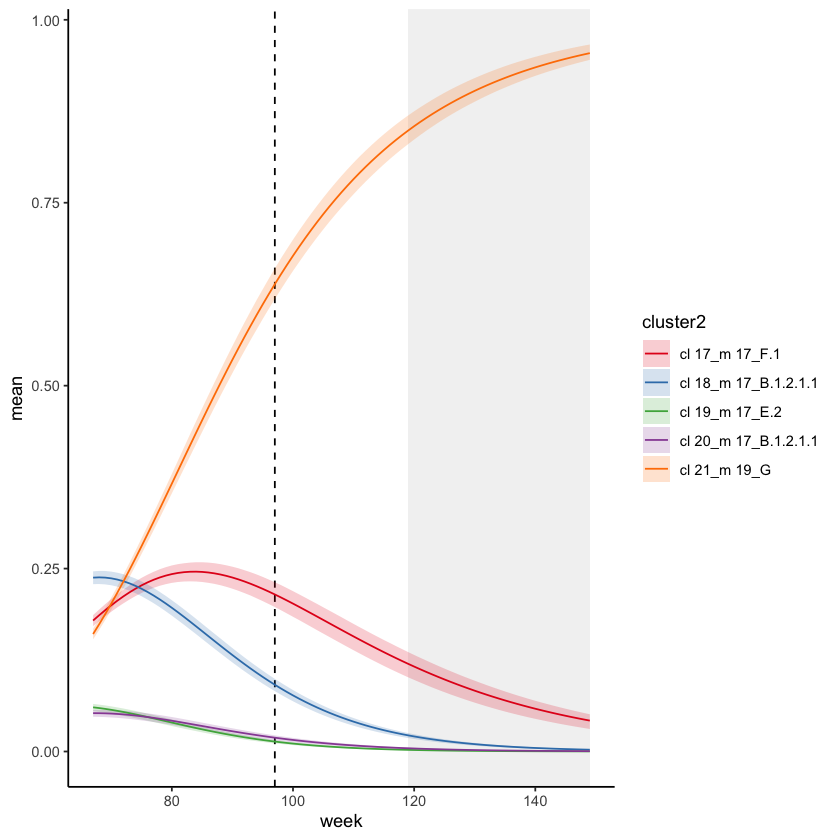

Warning message:
“Specifying width/height in layout() is now deprecated.
Please specify in ggplotly() or plot_ly()”
Warning message:
“Specifying width/height in layout() is now deprecated.
Please specify in ggplotly() or plot_ly()”
Warning message in RColorBrewer::brewer.pal(max(N, 3L), "Set2"):
“n too large, allowed maximum for palette Set2 is 8
Returning the palette you asked for with that many colors
”
Warning message in RColorBrewer::brewer.pal(max(N, 3L), "Set2"):
“n too large, allowed maximum for palette Set2 is 8
Returning the palette you asked for with that many colors
”
Warning message:
“Specifying width/height in layout() is now deprecated.
Please specify in ggplotly() or plot_ly()”
Warning message in RColorBrewer::brewer.pal(max(N, 3L), "Set2"):
“n too large, allowed maximum for palette Set2 is 8
Returning the palette you asked for with that many colors
”
Warning message in RColorBrewer::brewer.pal(max(N, 3L), "Set2"):
“n too large, allowed maximum for palette Set2 is 8
Retu

[1] "2021NH"


Warning message:
“Specifying width/height in layout() is now deprecated.
Please specify in ggplotly() or plot_ly()”
Warning message in RColorBrewer::brewer.pal(max(N, 3L), "Set2"):
“n too large, allowed maximum for palette Set2 is 8
Returning the palette you asked for with that many colors
”
Warning message in RColorBrewer::brewer.pal(max(N, 3L), "Set2"):
“n too large, allowed maximum for palette Set2 is 8
Returning the palette you asked for with that many colors
”


[1] "cl 1"
Running MCMC with 4 parallel chains...

Chain 1 Iteration:    1 / 2500 [  0%]  (Warmup) 
Chain 2 Iteration:    1 / 2500 [  0%]  (Warmup) 
Chain 3 Iteration:    1 / 2500 [  0%]  (Warmup) 
Chain 4 Iteration:    1 / 2500 [  0%]  (Warmup) 
Chain 1 Iteration:  100 / 2500 [  4%]  (Warmup) 
Chain 4 Iteration:  100 / 2500 [  4%]  (Warmup) 
Chain 3 Iteration:  100 / 2500 [  4%]  (Warmup) 
Chain 2 Iteration:  100 / 2500 [  4%]  (Warmup) 
Chain 1 Iteration:  200 / 2500 [  8%]  (Warmup) 
Chain 2 Iteration:  200 / 2500 [  8%]  (Warmup) 
Chain 4 Iteration:  200 / 2500 [  8%]  (Warmup) 
Chain 3 Iteration:  200 / 2500 [  8%]  (Warmup) 
Chain 2 Iteration:  300 / 2500 [ 12%]  (Warmup) 
Chain 1 Iteration:  300 / 2500 [ 12%]  (Warmup) 
Chain 4 Iteration:  300 / 2500 [ 12%]  (Warmup) 
Chain 3 Iteration:  300 / 2500 [ 12%]  (Warmup) 
Chain 2 Iteration:  400 / 2500 [ 16%]  (Warmup) 
Chain 1 Iteration:  400 / 2500 [ 16%]  (Warmup) 
Chain 4 Iteration:  400 / 2500 [ 16%]  (Warmup) 
Chain 3 Iteration:

`summarise()` has grouped output by 'metacluster', 'subclade'. You can override using the `.groups` argument.
Warning message:
“Removed 325 rows containing missing values or values outside the scale range (`geom_line()`).”
Warning message:
“Removed 325 rows containing missing values or values outside the scale range (`geom_line()`).”


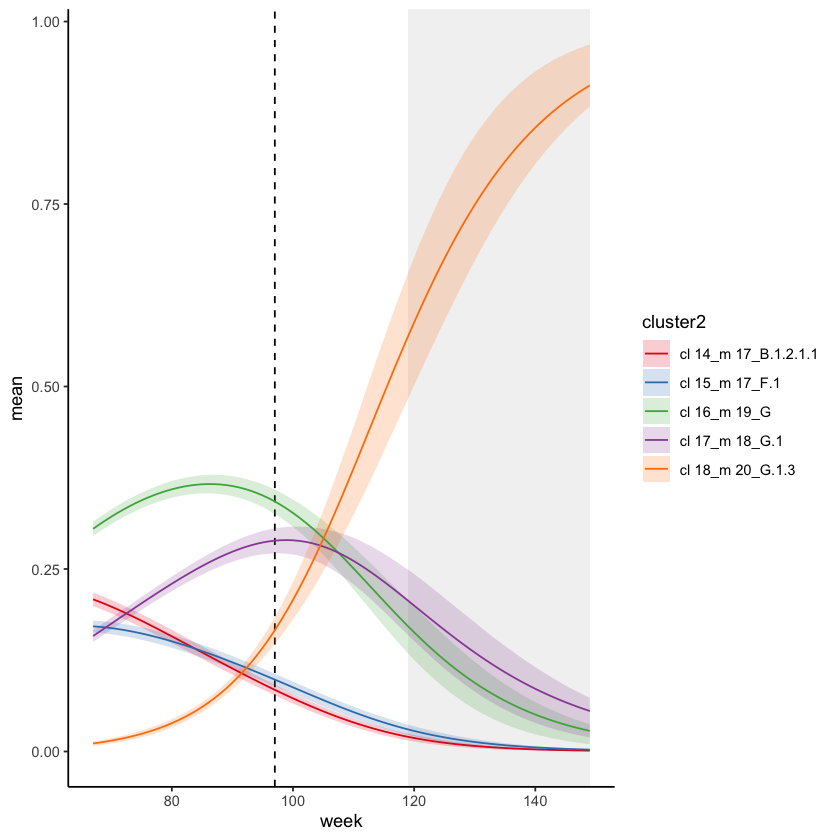

Warning message:
“Specifying width/height in layout() is now deprecated.
Please specify in ggplotly() or plot_ly()”
Warning message:
“Specifying width/height in layout() is now deprecated.
Please specify in ggplotly() or plot_ly()”
Warning message:
“Specifying width/height in layout() is now deprecated.
Please specify in ggplotly() or plot_ly()”
Warning message in RColorBrewer::brewer.pal(max(N, 3L), "Set2"):
“n too large, allowed maximum for palette Set2 is 8
Returning the palette you asked for with that many colors
”
Warning message in RColorBrewer::brewer.pal(max(N, 3L), "Set2"):
“n too large, allowed maximum for palette Set2 is 8
Returning the palette you asked for with that many colors
”


[1] "2022SH"


Warning message:
“Specifying width/height in layout() is now deprecated.
Please specify in ggplotly() or plot_ly()”
Warning message in RColorBrewer::brewer.pal(max(N, 3L), "Set2"):
“n too large, allowed maximum for palette Set2 is 8
Returning the palette you asked for with that many colors
”
Warning message in RColorBrewer::brewer.pal(max(N, 3L), "Set2"):
“n too large, allowed maximum for palette Set2 is 8
Returning the palette you asked for with that many colors
”


[1] "cl 1"
Running MCMC with 4 parallel chains...

Chain 1 Iteration:    1 / 2500 [  0%]  (Warmup) 
Chain 2 Iteration:    1 / 2500 [  0%]  (Warmup) 
Chain 3 Iteration:    1 / 2500 [  0%]  (Warmup) 
Chain 4 Iteration:    1 / 2500 [  0%]  (Warmup) 
Chain 1 Iteration:  100 / 2500 [  4%]  (Warmup) 
Chain 4 Iteration:  100 / 2500 [  4%]  (Warmup) 
Chain 3 Iteration:  100 / 2500 [  4%]  (Warmup) 
Chain 2 Iteration:  100 / 2500 [  4%]  (Warmup) 
Chain 1 Iteration:  200 / 2500 [  8%]  (Warmup) 
Chain 4 Iteration:  200 / 2500 [  8%]  (Warmup) 
Chain 3 Iteration:  200 / 2500 [  8%]  (Warmup) 
Chain 2 Iteration:  200 / 2500 [  8%]  (Warmup) 
Chain 4 Iteration:  300 / 2500 [ 12%]  (Warmup) 
Chain 1 Iteration:  300 / 2500 [ 12%]  (Warmup) 
Chain 3 Iteration:  300 / 2500 [ 12%]  (Warmup) 
Chain 2 Iteration:  300 / 2500 [ 12%]  (Warmup) 
Chain 4 Iteration:  400 / 2500 [ 16%]  (Warmup) 
Chain 1 Iteration:  400 / 2500 [ 16%]  (Warmup) 
Chain 3 Iteration:  400 / 2500 [ 16%]  (Warmup) 
Chain 2 Iteration:

`summarise()` has grouped output by 'metacluster', 'subclade'. You can override using the `.groups` argument.
Warning message:
“Removed 370 rows containing missing values or values outside the scale range (`geom_line()`).”
Warning message:
“Removed 370 rows containing missing values or values outside the scale range (`geom_line()`).”


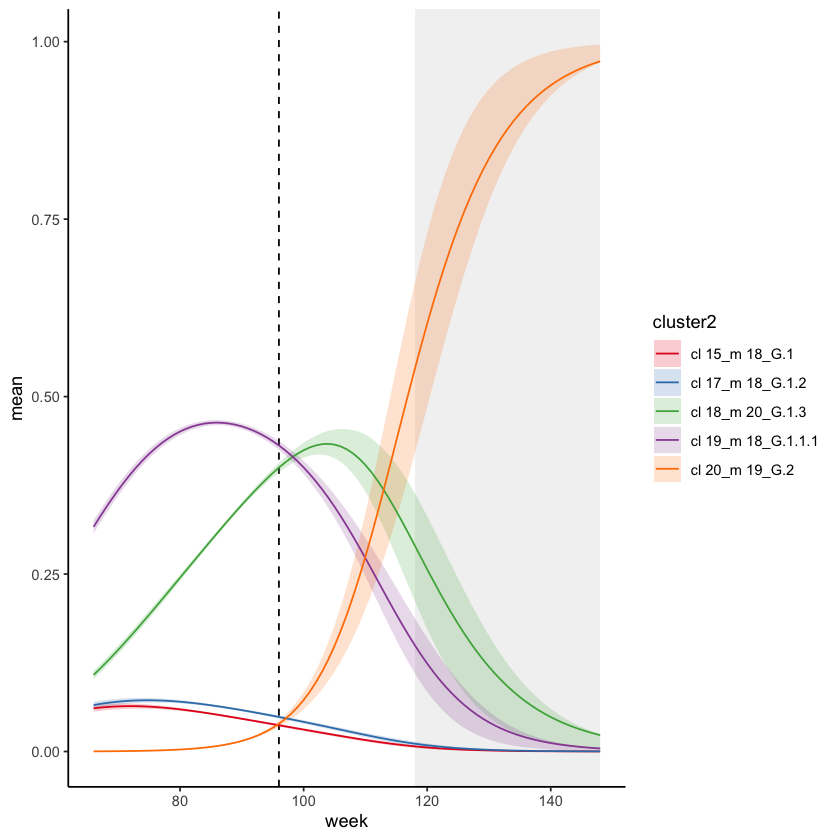

Warning message:
“Specifying width/height in layout() is now deprecated.
Please specify in ggplotly() or plot_ly()”
Warning message:
“Specifying width/height in layout() is now deprecated.
Please specify in ggplotly() or plot_ly()”
Warning message in RColorBrewer::brewer.pal(max(N, 3L), "Set2"):
“n too large, allowed maximum for palette Set2 is 8
Returning the palette you asked for with that many colors
”
Warning message in RColorBrewer::brewer.pal(max(N, 3L), "Set2"):
“n too large, allowed maximum for palette Set2 is 8
Returning the palette you asked for with that many colors
”
Warning message:
“Specifying width/height in layout() is now deprecated.
Please specify in ggplotly() or plot_ly()”
Warning message in RColorBrewer::brewer.pal(max(N, 3L), "Set2"):
“n too large, allowed maximum for palette Set2 is 8
Returning the palette you asked for with that many colors
”
Warning message in RColorBrewer::brewer.pal(max(N, 3L), "Set2"):
“n too large, allowed maximum for palette Set2 is 8
Retu

[1] "2022NH"


Warning message:
“Specifying width/height in layout() is now deprecated.
Please specify in ggplotly() or plot_ly()”
Warning message in RColorBrewer::brewer.pal(max(N, 3L), "Set2"):
“n too large, allowed maximum for palette Set2 is 8
Returning the palette you asked for with that many colors
”
Warning message in RColorBrewer::brewer.pal(max(N, 3L), "Set2"):
“n too large, allowed maximum for palette Set2 is 8
Returning the palette you asked for with that many colors
”


[1] "cl 2"
Running MCMC with 4 parallel chains...

Chain 1 Iteration:    1 / 2500 [  0%]  (Warmup) 
Chain 2 Iteration:    1 / 2500 [  0%]  (Warmup) 
Chain 3 Iteration:    1 / 2500 [  0%]  (Warmup) 
Chain 4 Iteration:    1 / 2500 [  0%]  (Warmup) 
Chain 3 Iteration:  100 / 2500 [  4%]  (Warmup) 
Chain 1 Iteration:  100 / 2500 [  4%]  (Warmup) 
Chain 2 Iteration:  100 / 2500 [  4%]  (Warmup) 
Chain 4 Iteration:  100 / 2500 [  4%]  (Warmup) 
Chain 3 Iteration:  200 / 2500 [  8%]  (Warmup) 
Chain 2 Iteration:  200 / 2500 [  8%]  (Warmup) 
Chain 1 Iteration:  200 / 2500 [  8%]  (Warmup) 
Chain 4 Iteration:  200 / 2500 [  8%]  (Warmup) 
Chain 3 Iteration:  300 / 2500 [ 12%]  (Warmup) 
Chain 4 Iteration:  300 / 2500 [ 12%]  (Warmup) 
Chain 2 Iteration:  300 / 2500 [ 12%]  (Warmup) 
Chain 1 Iteration:  300 / 2500 [ 12%]  (Warmup) 
Chain 3 Iteration:  400 / 2500 [ 16%]  (Warmup) 
Chain 4 Iteration:  400 / 2500 [ 16%]  (Warmup) 
Chain 2 Iteration:  400 / 2500 [ 16%]  (Warmup) 
Chain 1 Iteration:

`summarise()` has grouped output by 'metacluster', 'subclade'. You can override using the `.groups` argument.
Warning message:
“Removed 365 rows containing missing values or values outside the scale range (`geom_line()`).”
Warning message:
“Removed 365 rows containing missing values or values outside the scale range (`geom_line()`).”


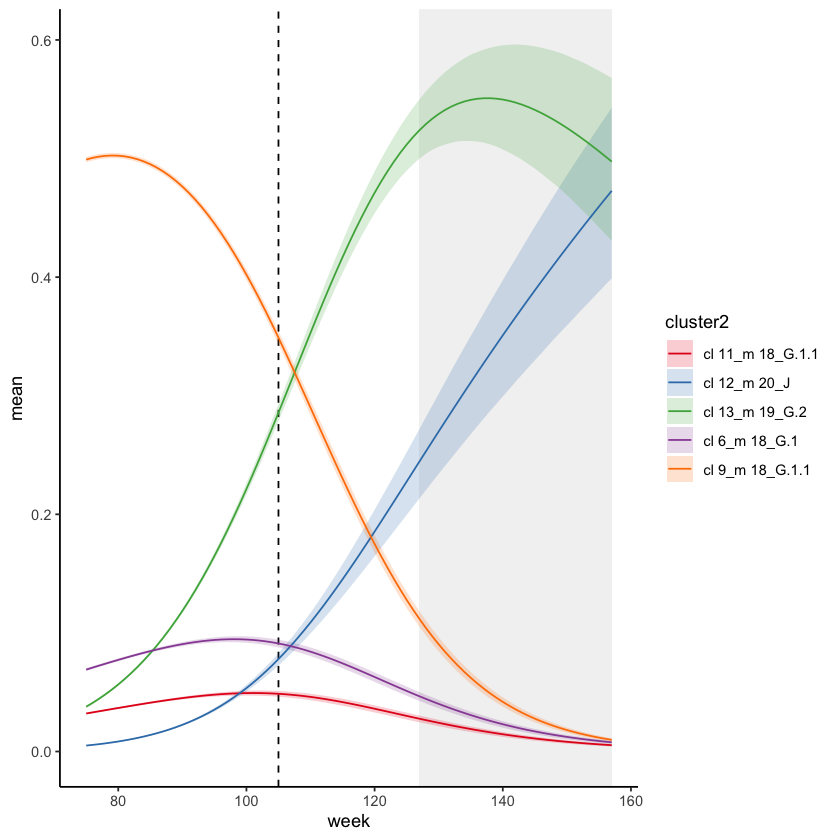

Warning message:
“Specifying width/height in layout() is now deprecated.
Please specify in ggplotly() or plot_ly()”
Warning message:
“Specifying width/height in layout() is now deprecated.
Please specify in ggplotly() or plot_ly()”
Warning message:
“Specifying width/height in layout() is now deprecated.
Please specify in ggplotly() or plot_ly()”
Warning message in RColorBrewer::brewer.pal(max(N, 3L), "Set2"):
“n too large, allowed maximum for palette Set2 is 8
Returning the palette you asked for with that many colors
”
Warning message in RColorBrewer::brewer.pal(max(N, 3L), "Set2"):
“n too large, allowed maximum for palette Set2 is 8
Returning the palette you asked for with that many colors
”


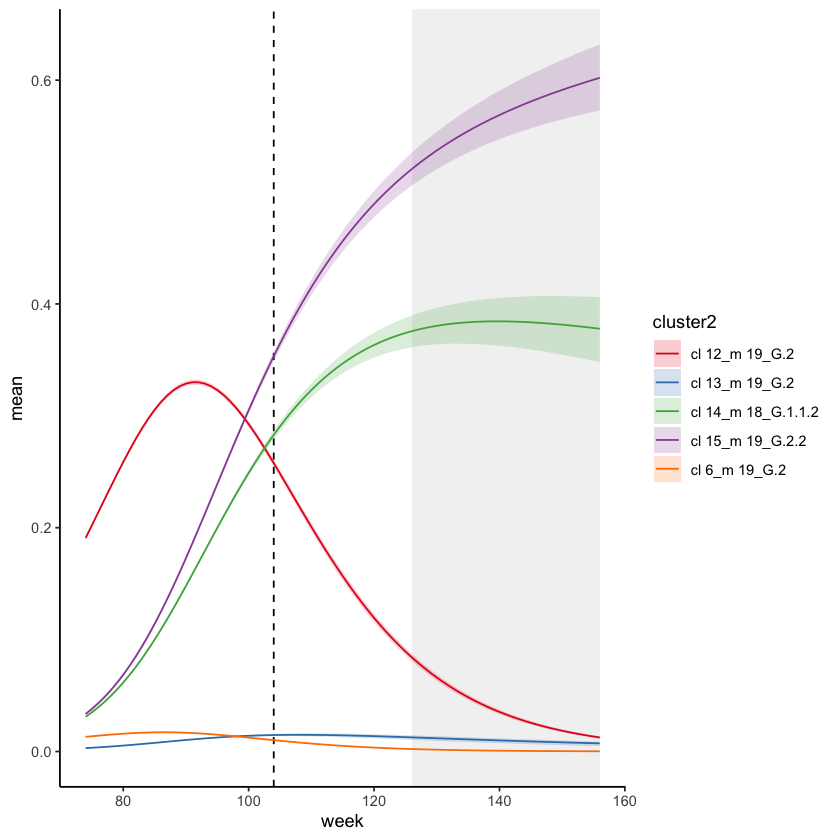

In [4]:

best_isolate_df <- data.frame()
sum_theta_df <- data.frame()
sum_Re_df <- data.frame()


for(i in c(1:18)){

    #i <- 17
    season.interest <- season_analyzed.v[i]
    print(season.interest)

    data.name <- paste("/Users/jumpeiito/Dropbox/論文/antigenicity/PLANT/analysis/external_validation/sum_final_season_250304_ver12_split_fixed_s20000_lr1.00E-04_wd0.01_rwd0.005_csew0_csea0_sw0.2_csewv0_swv0.2_cw0.05_rid256_dp0.05_eid64_edp0.1_lgw0.01_bs16_facebookesm2_t33_650M_UR50D/PLANT_epiflu_human_241212_with_coords_",season.interest,".csv",sep="")
    data <- read.csv(data.name,header=T, comment.char="")
    dim(data)


    data <- data %>% left_join(data_full %>% distinct(Isolate_Id, .keep_all=T) %>% select(Isolate_Id, metacluster), by = "Isolate_Id")

    data.nextclade.name <- "/Users/jumpeiito/Dropbox/論文/antigenicity/PLANT/PLANT/data/nextclade.tsv"
    data.nextclade <- read.table(data.nextclade.name, header=T, sep="\t", comment.char="", quote="")
    dim(data.nextclade)

    data.nextclade <- data.nextclade %>% select(seqName,aaSubstitutions,clade,subclade,short.clade,proposedSubclade)

    data.nextclade <- data.nextclade %>% mutate(ID = gsub(".+\\|","", seqName))
    dim(data.nextclade)

    head(data.nextclade)

    data <- data %>% inner_join(data.nextclade, by ="ID")

    head(data)

    # season.v <- c("1997NH", "1998SH", "1998NH", "1999SH", "1999NH", 
    #     "2000SH", "2000NH", "2001SH", "2001NH", "2002SH", "2002NH", "2003SH", "2003NH", "2004SH", "2004NH",
    #     "2005SH", "2005NH", "2006SH", "2006NH", "2007SH", "2007NH", "2008SH", "2008NH", "2009SH", "2009NH",
    #     "2010SH", "2010NH", "2011SH", "2011NH", "2012SH", "2012NH", "2013SH", "2013NH", "2014SH", "2014NH",
    #     "2015SH", "2015NH", "2016SH", "2016NH", "2017SH", "2017NH", "2018SH", "2018NH", "2019SH", "2019NH",
    #     "2020SH", "2020NH", "2021SH", "2021NH", "2022SH", "2022NH", "2023SH", "2023NH")

    data <- data %>%
    mutate(
    # virus のシーズン情報
    date = as.Date(date),  # 文字列の場合は日付型に変換
    year_virus = year(date),
    season_virus = case_when(
      month(date) >= 2 & month(date) <= 8  ~ paste0(year_virus, "SH"),
      month(date) == 1                           ~ paste0(year_virus - 1, "NH"),
      month(date) >= 9                           ~ paste0(year_virus, "NH")
    )    
    ) %>%
    select(-year_virus)  # 一時カラムを削除

    data <- data %>% mutate(z1 = z1 * scale_factor,
                        z2 = z2 * scale_factor,
                        z3 = z3 * scale_factor)

    data <- data %>% filter(season_virus %in% season.v)

    data <- data %>% mutate(season_virus = factor(season_virus, levels = season.v))

    # 1. 対象期間の範囲を取得
    target_index <- which(season.v == season.interest)

    # 2. 3年前までのseasonベクトルを取り出す（例：2019SH〜2022SH）
    season_range <- season.v[(target_index - 3):target_index]


    season_range

    data <- data %>%
    filter(season_virus %in% season_range)

    head(data)


    X <- data[, c("z1", "z2", "z3")]
    X <- as.data.frame(scale(X))

    #n.cluster.max <- as.integer(round(nrow(data) / 5000)) * 10
    #n.cluster.max <- min(c(n.cluster.max, 40))
    #n.cluster.min <- n.cluster.max / 2

    #n.cluster.max

    set.seed(42)
    X_unique <- X[!duplicated(data$seq), ]



    # GMMクラスタリング
    gmm_model <- Mclust(X_unique, G = seq(10, 50, by = 10))
    summary(gmm_model)

    # 全データにクラスタ割当
    X$cluster <- as.numeric(predict(gmm_model, newdata = X)$classification)

    # 平均と共分散を取得
    means <- gmm_model$parameters$mean  # 3 x G matrix
    sigmas <- gmm_model$parameters$variance$sigma  # 3 x 3 x G array
    G <- gmm_model$G  # number of clusters

    # マハラノビス距離行列（対称にするため、i→j, j→iの平均）
    mahalanobis_matrix <- matrix(0, nrow = G, ncol = G)

    for (i in 1:(G-1)) {
    for (j in (i+1):G) {
    mu_i <- means[, i]
    mu_j <- means[, j]
    Sigma_i <- sigmas[,, i]
    Sigma_j <- sigmas[,, j]

    # i->j と j->i のマハラノビス距離を平均
    d_ij <- mahalanobis(mu_j, center = mu_i, cov = Sigma_i)
    d_ji <- mahalanobis(mu_i, center = mu_j, cov = Sigma_j)
    d_avg <- min(d_ij, d_ji)

    mahalanobis_matrix[i, j] <- d_avg
    mahalanobis_matrix[j, i] <- d_avg
    }
    }

    # 距離行列として変換
    dist_obj <- as.dist(mahalanobis_matrix)

    # 階層クラスタリング
    hc <- hclust(dist_obj, method = "average")  # 他に "single" や "complete" も可

    # 各クラスタの最近傍マハラノビス距離を取得
    nearest_dist <- apply(mahalanobis_matrix + diag(Inf, G), 1, min)

    # 負値になる場合は0でクリップ
    threshold <- 1 #as.numeric(quantile(nearest_dist, 0.1))
    threshold

    # しきい値でクラスタを切る（例：1.0 σ）

    merged_cluster_ids <- cutree(hc, h = threshold)

    # cluster 1:G に対応する merged_cluster を得る
    cluster_map <- merged_cluster_ids

    # 元データにマージ後クラスタを割り当て
    X$merged_cluster <- cluster_map[X$cluster]


    # 9. dataフレームに統合クラスタを付加
    data$cluster_temp <- paste0("cl_temp_", X$merged_cluster)

    # 結果の確認
    table(data$cluster_temp)


    # 結果を表示
    head(data)



    get_mode <- function(x) {
    x <- na.omit(x)
    if (length(x) == 0) return(NA)
    ux <- unique(x)
    ux[which.max(tabulate(match(x, ux)))]
    }


    total_count <- nrow(data)


    cluster.info <- data %>%
    group_by(cluster_temp) %>%
    summarize(
    count = n(),
    emergence_date = as.Date(quantile(as.numeric(date), 0.05, na.rm = TRUE), origin = "1970-01-01"),
    major_subclade = get_mode(subclade)
    ) %>%
    mutate(prop = count / total_count) %>%
    filter(count >= 20, prop > 0.005)




    cluster.info <- cluster.info %>% arrange(emergence_date) %>% mutate(cluster = paste("cl ",1:nrow(cluster.info),sep=""))
    cluster.info %>% as.data.frame()

    dim(data)

    data <- data %>% left_join(cluster.info, by="cluster_temp")

    data <- data %>% filter(cluster %in% as.character(cluster.info$cluster))

    p_cluster <- plot_ly(
    data = data, 
    x = ~z1,
    y = ~z2,
    z = ~z3,
    color = ~cluster,
    #colors = "plasma",
    type = "scatter3d",
    mode = "markers",
    marker = list(size = 3)
    ) %>%
    layout(
    title = "Year",
    width = 800,
    height = 600,
    paper_bgcolor = "white",  # キャンバス全体は白のまま

    scene = list(
      xaxis = list(
        title = list(text = "X", font = list(size = 20)),
        tickfont = list(size = 15),
        linewidth = 6,
        gridwidth = 3,
        showbackground = TRUE,                  # ← これが必須！
        backgroundcolor = "gainsboro"              # ← 背景面の色
      ),
      yaxis = list(
        title = list(text = "Y", font = list(size = 20)),
        tickfont = list(size = 15),
        linewidth = 6,
        gridwidth = 3,
        showbackground = TRUE,
        backgroundcolor = "gainsboro"
      ),
      zaxis = list(
        title = list(text = "Z", font = list(size = 20)),
        tickfont = list(size = 15),
        linewidth = 6,
        gridwidth = 3,
        showbackground = TRUE,
        backgroundcolor = "gainsboro"
      ),
      aspectmode = "manual",
      aspectratio = list(x = 1, y = 1, z = 1) #,
      #camera = list(
      #  eye = list(x = 1.5, y = 1.2, z = 0.1)
      #)
    )
    )

    # 2. HTMLとして一時保存

    html.name <- paste('PLANT_cluster_',season.interest,'.html',sep="")
    saveWidget(p_cluster, html.name, selfcontained = TRUE)

    table(data$cluster)

    #
    #
    #












    dim(data)

    length(unique(data$cluster))

    data.interest <- data # %>% filter(date >= min_cutoff_date)

    ref_cluster <- data.interest %>% filter(season_virus == season_range[1]) %>% group_by(cluster) %>% summarize(count = n()) %>% top_n(1, count) %>% pull(cluster)
    print(ref_cluster)

    head(data.interest)


    # 1. dateを7日ごとのbinに変換（各週の月曜日などに揃える）
    data.binned <- data.interest %>%
    mutate(bin = floor_date(date, unit = "week"))

    # 2. 各bin・clusterごとのカウント
    counts <- data.binned %>%
    group_by(bin, cluster) %>%
    summarise(count = n(), .groups = "drop")

    # 3. 全binでの総数が20以下のclusterを除外
    total_sum <- sum(counts$count)

    # 4. 行: time bin、列: clusterのmatrixを作成
    count_matrix <- counts %>%
    pivot_wider(names_from = cluster, values_from = count, values_fill = 0) %>%
    arrange(bin)


    # クラスタごとの合計カウントを計算（bin列は除く）
    cluster_totals <- colSums(count_matrix[,-1])  # bin列を除いて合計

    # 現在の列順を取得
    cols <- colnames(count_matrix)

    # bin列とtop_clusterを前に持ってきて、残りを後ろに並べる
    new_col_order <- c("bin", ref_cluster, setdiff(cols, c("bin", ref_cluster)))

    # 並び替え
    count_matrix <- count_matrix[, new_col_order]

    # 結果確認
    head(count_matrix)

    # 結果の確認用
    #cluster_count.J2 <- data.interest %>% filter(subclade %in% c("J.2","J.2.1", "J.2.2")) %>% select(metacluster2, subclade, date, season_virus, cluster) %>% group_by(cluster) %>% summarize(count_J2 = n())
    #cluster_count <- data.interest %>% select(metacluster2, subclade, date, season_virus, cluster) %>% group_by(cluster) %>% summarize(count = n())

    #cluster_count.J2 <- cluster_count.J2 %>% left_join(cluster_count, by ="cluster")


    Y <- count_matrix %>% select(-bin) %>% as.matrix()

    count.group <- apply(Y,2,sum)
    count.total <- sum(count.group)
    count.total

    sort(count.group)[length(count.group)]

    X <- as.matrix(data.frame(X0 = 1, X1 = as.numeric(count_matrix$bin) - min(as.numeric(count_matrix$bin))))


    K = ncol(Y)
    N = nrow(Y)

    future_weeks <- 52

    current_end <- N
    vaccine_end <- N + future_weeks


    current_start <- N - 30
    if("NH" %in% season.interest){
    vaccine_start <- N - 22
    }

    vaccine_start <- N + 22
    if("NH" %in% season.interest){
    vaccine_start <- N + 30
    }

    X_future <- matrix(0, nrow = future_weeks, ncol = 2)
    X_future[,1] <- 1
    X_future[,2] <- X[N,2] + 7 * (1:future_weeks)

    # 結合
    X_all <- rbind(X, X_future)

    N_all <- nrow(X_all)

    head(Y)

    head(X)

    generation_time <- 3
    bin.size = 1
    Y_sum.v <- apply(Y,1,sum)

    multi_nomial_model


    data.stan <- list(K = K,
                  N = N,
                  N_all = N_all,
                  D = 2,
                  X = X_all,
                  Y = Y,
                  sigma_time = 5,
                  generation_time = generation_time,
                  bin_size = bin.size,
                  Y_sum = Y_sum.v)

    Y_sum.v 

    fit.stan <- multi_nomial_model$sample(
    data=data.stan,
    iter_sampling=2000,
    iter_warmup=500,
    seed=1234,
    parallel_chains = 4,
    max_treedepth = 20,
    chains=4)

    stat.info <- fit.stan$summary("growth_rate") %>% as.data.frame()
    stat.info$cluster <- colnames(Y)[2:ncol(Y)]

    stat.info.q <- fit.stan$summary("growth_rate", ~quantile(.x, probs = c(0.025,0.975))) %>% as.data.frame() %>% rename(q0.25 = `2.5%`, q97.5 = `97.5%`)
    stat.info <- stat.info %>% inner_join(stat.info.q,by="variable")

    stat.info <- stat.info %>% select(mean, rhat, ess_bulk, ess_tail, cluster, q0.25, q97.5)
    stat.info <- rbind(stat.info, data.frame(mean = 1.0, rhat = 1.0, ess_bulk = 10000, ess_tail = 10000, q0.25 = 1.0, q97.5 = 1.0, cluster = ref_cluster))


    get_mode <- function(x) {
    x <- na.omit(x)
    if (length(x) == 0) return(NA)
    ux <- unique(x)
    ux[which.max(tabulate(match(x, ux)))]
    }

    metacluster.info<- data.interest %>% mutate(cluster = as.character(cluster)) %>% 
    group_by(cluster) %>%
    summarise(
    metacluster = get_mode(metacluster),
    clade = get_mode(clade),
    subclade = get_mode(subclade),
    short.clade = get_mode(short.clade),
    proposedSubclade = get_mode(proposedSubclade),
    .groups = "drop"
    )


    stat.info <- stat.info %>% left_join(metacluster.info, by="cluster")

    stat.info <- stat.info %>% arrange(mean)
    stat.info <- stat.info %>% mutate(cluster = factor(cluster, levels = stat.info$cluster))

    (stat.info)


    metacluster.v <- c("m 1","m 2","m 3","m 4","m 5","m 6","m 7","m 8","m 9","m 10","m 11","m 12","m 13","m 14","m 15","m 16","m 17","m 18","m 19","m 20")
    stat.info <- stat.info %>% mutate(metacluster = factor(metacluster, levels = metacluster.v))

    stat.info <- stat.info %>% mutate(cluster2 = paste(cluster, metacluster, subclade, sep="_"))

    # theta の抽出
    theta_array <- fit.stan$draws("theta", format = "draws_array")  # (iterations, chains, N_all, K)

    # draws_df 形式に変換
    theta_df <- as_draws_df(theta_array)
    tail(theta_df)


    # 変数名取得
    theta_names <- names(theta_df)

    # theta[週,株] のインデックスを抽出
    theta_index_df <- tibble(variable = theta_names) %>%
    filter(grepl("^theta\\[", variable)) %>%
    mutate(
    week = as.integer(gsub("theta\\[([0-9]+),.*", "\\1", variable)),
    col_Id = as.integer(gsub("theta\\[[0-9]+,([0-9]+)\\]", "\\1", variable))
    )


    head(theta_index_df)

    theta_summary <- theta_df %>%
    #select(all_of(theta_future_names)) %>%
    pivot_longer(everything(), names_to = "variable", values_to = "value") %>%
    left_join(theta_index_df, by = "variable") %>%
    group_by(week, col_Id) %>%
    summarise(
    mean = mean(value),
    lower = quantile(value, 0.25),
    upper = quantile(value, 0.75),
    .groups = "drop"
    )

    cluster_col.df <- data.frame(col_Id = 1:ncol(Y), cluster = as.character(colnames(Y)))

    theta_summary <- theta_summary %>% left_join(cluster_col.df, by = "col_Id")
    theta_summary <- theta_summary %>% mutate(cluster = factor(cluster, levels = rev(stat.info$cluster)))

    theta_summary <- theta_summary %>% left_join(stat.info %>% select(cluster, metacluster, subclade), by="cluster")
    theta_summary <- theta_summary %>% mutate(cluster2 = paste(cluster,metacluster, subclade, sep="_"))

    theta_summary.vaccine_period <- theta_summary %>% filter(week %in% vaccine_start:vaccine_end)

    theta_summary.vaccine_period.mean <- theta_summary.vaccine_period %>%
    group_by(metacluster, subclade, cluster2) %>%
    summarize(mean = mean(mean), lower = mean(lower), upper = mean(upper)) %>% ungroup()

    theta_summary.vaccine_period.mean <- theta_summary.vaccine_period.mean %>% arrange(desc(mean))

    top_lineage.v <- theta_summary.vaccine_period.mean %>% slice_max(mean, n = 5, with_ties = FALSE) %>% pull(cluster2)


    theta_summary.filtered <- theta_summary %>% filter(cluster2 %in% top_lineage.v)

    target_lineage.v <- theta_summary.vaccine_period.mean %>% filter(upper > 0) %>% pull(cluster2)

    #plot

    g <- ggplot(theta_summary.filtered, aes(x = week, y = mean, color = cluster2)) +
    geom_vline(xintercept=current_end, linetype="dashed") + 
    annotate("rect", xmin = vaccine_start, xmax = vaccine_end, ymin = -Inf, ymax = Inf, alpha = 0.2, fill = "gray") +
    geom_ribbon(aes(ymin = lower, ymax = upper, fill = cluster2), alpha = 0.2, color = NA) +
    geom_line(stat = "identity") +
    theme_classic() +
    scale_color_brewer(palette = "Set1") +
    scale_fill_brewer(palette = "Set1") +
    scale_x_continuous(limits=c(current_start, vaccine_end))

    print(g)

    pdf.name <- paste('forcast.',season.interest,'.pdf', sep="")
    pdf(pdf.name, width = 4, height = 2.5)
    print(g)
    dev.off()


    data.interest.merged <- data.interest %>%
    left_join(stat.info %>% select(cluster, cluster2, mean),
            by = "cluster")



    p_fitness <- plot_ly(
    data = data.interest.merged, 
    x = ~z1,
    y = ~z2,
    z = ~z3,
    color = ~mean,
    colors = "plasma",
    type = "scatter3d",
    mode = "markers",
    marker = list(size = 3)
    ) %>%
    layout(
    title = "Year",
    width = 800,
    height = 600,
    paper_bgcolor = "white",  # キャンバス全体は白のまま

    scene = list(
      xaxis = list(
        title = list(text = "X", font = list(size = 20)),
        tickfont = list(size = 15),
        linewidth = 6,
        gridwidth = 3,
        showbackground = TRUE,                  # ← これが必須！
        backgroundcolor = "gainsboro"              # ← 背景面の色
      ),
      yaxis = list(
        title = list(text = "Y", font = list(size = 20)),
        tickfont = list(size = 15),
        linewidth = 6,
        gridwidth = 3,
        showbackground = TRUE,
        backgroundcolor = "gainsboro"
      ),
      zaxis = list(
        title = list(text = "Z", font = list(size = 20)),
        tickfont = list(size = 15),
        linewidth = 6,
        gridwidth = 3,
        showbackground = TRUE,
        backgroundcolor = "gainsboro"
      ),
      aspectmode = "manual",
      aspectratio = list(x = 1, y = 1, z = 1) #,
      #camera = list(
      #  eye = list(x = 1.5, y = 1.2, z = 0.1)
      #)
    )
    )

    # 2. HTMLとして一時保存

    html.name <- paste('PLANT_fitness_',season.interest,'.html',sep="")
    saveWidget(p_fitness, html.name, selfcontained = TRUE)


    p_metacluster <- plot_ly(
    data = data.interest.merged, 
    x = ~z1,
    y = ~z2,
    z = ~z3,
    color = ~metacluster,
    #colors = "plasma",
    type = "scatter3d",
    mode = "markers",
    marker = list(size = 3)
    ) %>%
    layout(
    title = "Year",
    width = 800,
    height = 600,
    paper_bgcolor = "white",  # キャンバス全体は白のまま

    scene = list(
      xaxis = list(
        title = list(text = "X", font = list(size = 20)),
        tickfont = list(size = 15),
        linewidth = 6,
        gridwidth = 3,
        showbackground = TRUE,                  # ← これが必須！
        backgroundcolor = "gainsboro"              # ← 背景面の色
      ),
      yaxis = list(
        title = list(text = "Y", font = list(size = 20)),
        tickfont = list(size = 15),
        linewidth = 6,
        gridwidth = 3,
        showbackground = TRUE,
        backgroundcolor = "gainsboro"
      ),
      zaxis = list(
        title = list(text = "Z", font = list(size = 20)),
        tickfont = list(size = 15),
        linewidth = 6,
        gridwidth = 3,
        showbackground = TRUE,
        backgroundcolor = "gainsboro"
      ),
      aspectmode = "manual",
      aspectratio = list(x = 1, y = 1, z = 1) #,
      #camera = list(
      #  eye = list(x = 1.5, y = 1.2, z = 0.1)
      #)
    )
    )

    # 2. HTMLとして一時保存

    html.name <- paste('PLANT_metacluster_',season.interest,'.html',sep="")
    saveWidget(p_metacluster, html.name, selfcontained = TRUE)




    p_cluster <- plot_ly(
    data = data.interest.merged, 
    x = ~z1,
    y = ~z2,
    z = ~z3,
    color = ~cluster2,
    #colors = "plasma",
    type = "scatter3d",
    mode = "markers",
    marker = list(size = 3)
    ) %>%
    layout(
    title = "Year",
    width = 800,
    height = 600,
    paper_bgcolor = "white",  # キャンバス全体は白のまま

    scene = list(
      xaxis = list(
        title = list(text = "X", font = list(size = 20)),
        tickfont = list(size = 15),
        linewidth = 6,
        gridwidth = 3,
        showbackground = TRUE,                  # ← これが必須！
        backgroundcolor = "gainsboro"              # ← 背景面の色
      ),
      yaxis = list(
        title = list(text = "Y", font = list(size = 20)),
        tickfont = list(size = 15),
        linewidth = 6,
        gridwidth = 3,
        showbackground = TRUE,
        backgroundcolor = "gainsboro"
      ),
      zaxis = list(
        title = list(text = "Z", font = list(size = 20)),
        tickfont = list(size = 15),
        linewidth = 6,
        gridwidth = 3,
        showbackground = TRUE,
        backgroundcolor = "gainsboro"
      ),
      aspectmode = "manual",
      aspectratio = list(x = 1, y = 1, z = 1) #,
      #camera = list(
      #  eye = list(x = 1.5, y = 1.2, z = 0.1)
      #)
    )
    )

    # 2. HTMLとして一時保存

    html.name <- paste('PLANT_cluster_',season.interest,'.html',sep="")
    saveWidget(p_cluster, html.name, selfcontained = TRUE)



    #i <- 1
    #season.interest <- season_analyzed.v[i]
    #print(season.interest)

    data.interest <- data.interest %>% mutate(cluster2 = paste(cluster,metacluster,subclade,sep="_"))

    get_representative_isolate <- function(data.interest, season.interest, target_lineage.v) {
    # 対象のデータを抽出
    data.interest.target <- data.interest %>%
    filter(cluster2 %in% target_lineage.v, season_virus == season.interest)
    #print(head(data.interest.target))

    # 中心座標を算出（各クラスタの中央値 → 全体の平均）
    center_coord <- data.interest.target %>%
    summarize(z1 = median(z1), z2 = median(z2), z3 = median(z3))

    # 中心からの距離をもとに代表Isolateとそのcluster2を選定
    rep_entry <- data.interest %>%
    mutate(dist_to_center = sqrt((z1 - center_coord$z1)^2 +
                                   (z2 - center_coord$z2)^2 +
                                   (z3 - center_coord$z3)^2)) %>%
    slice_min(dist_to_center, n = 1, with_ties = FALSE) %>%
    select(Isolate_Id, cluster2)

    return(list(
    Isolate_Id = rep_entry$Isolate_Id,
    cluster2 = rep_entry$cluster2,
    center_coord = center_coord
    ))
    }


    result.targets <- get_representative_isolate(data.interest, season.interest, target_lineage.v)
    Isolate_Id.targets <- result.targets$Isolate_Id
    cluster2.targets <- result.targets$cluster2


    target_lineage.v


    get_representative_weighted_isolate <- function(data.interest, theta_summary.vaccine_period.mean, season.interest, target_lineage.v) {
    # 対象のデータを抽出
    data.interest.target <- data.interest %>%
    filter(cluster2 %in% target_lineage.v, season_virus == season.interest)

    data.interest.target <- data.interest.target %>% left_join(theta_summary.vaccine_period.mean %>% select(cluster2, mean), by = "cluster2")

    # 中心座標を算出（各クラスタの中央値 → 全体の平均）
    center_coord <- tibble(
    z1 = weightedMedian(data.interest.target$z1, data.interest.target$mean),
    z2 = weightedMedian(data.interest.target$z2, data.interest.target$mean),
    z3 = weightedMedian(data.interest.target$z3, data.interest.target$mean)
    )

    # 中心からの距離をもとに代表Isolateとそのcluster2を選定
    rep_entry <- data.interest %>%
    mutate(dist_to_center = sqrt((z1 - center_coord$z1)^2 +
                                   (z2 - center_coord$z2)^2 +
                                   (z3 - center_coord$z3)^2)) %>%
    slice_min(dist_to_center, n = 1, with_ties = FALSE) %>%
    select(Isolate_Id, cluster2)

    return(list(
    Isolate_Id = rep_entry$Isolate_Id,
    cluster2 = rep_entry$cluster2,
    center_coord = center_coord
    ))
    }

    result.weighted_targets <- get_representative_weighted_isolate(data.interest, theta_summary.vaccine_period.mean, season.interest, target_lineage.v)
    Isolate_Id.weighted_targets <- result.weighted_targets$Isolate_Id
    cluster2.weighted_targets <- result.weighted_targets$cluster2


    get_representative_center_isolate <- function(data.interest, season.interest) {
    # 対象のデータを抽出
    data.interest.target <- data.interest %>%
    filter(season_virus == season.interest)

    # 中心座標を算出（各クラスタの中央値 → 全体の平均）
    center_coord <- data.interest.target %>%
    summarize(z1 = median(z1), z2 = median(z2), z3 = median(z3), .groups = "drop")

    # 中心からの距離をもとに代表Isolateとそのcluster2を選定
    rep_entry <- data.interest %>%
    mutate(dist_to_center = sqrt((z1 - center_coord$z1)^2 +
                                   (z2 - center_coord$z2)^2 +
                                   (z3 - center_coord$z3)^2)) %>%
    slice_min(dist_to_center, n = 1, with_ties = FALSE) %>%
    select(Isolate_Id, cluster2)

    return(list(
    Isolate_Id = rep_entry$Isolate_Id,
    cluster2 = rep_entry$cluster2,
    center_coord = center_coord
    ))
    }

    result.center <- get_representative_center_isolate(data.interest, season.interest)
    Isolate_Id.center <- result.center$Isolate_Id
    cluster2.center <- result.center$cluster2


    result.targets$center_coord
    result.weighted_targets$center_coord
    result.center$center_coord




    best_cluster2.fitness <- stat.info %>%
    slice_max(mean, n = 1, with_ties = FALSE) %>%
    pull(cluster2) %>% as.character()

    best_cluster2.nowcast <- theta_summary %>%
    filter(week == current_end) %>%
    slice_max(mean, n = 1, with_ties = FALSE) %>%
    pull(cluster2) %>% as.character()

    best_cluster2.forcast <- theta_summary %>%
    filter(week == vaccine_start) %>%
    slice_max(mean, n = 1, with_ties = FALSE) %>%
    pull(cluster2) %>% as.character()



    get_nearest_isolate_id_to_cluster <- function(data.interest, target_cluster, season.interest) {
    # クラスタ中心座標を取得
    data.interest.final_season <- data.interest %>%
    filter(season_virus == season.interest)

    cluster_centers <- data.interest.final_season %>%
    group_by(cluster2) %>%
    summarise(
      z1 = median(z1, na.rm = TRUE),
      z2 = median(z2, na.rm = TRUE),
      z3 = median(z3, na.rm = TRUE),
      .groups = "drop"
    )

    cluster_coord <- cluster_centers %>%
    filter(cluster2 == target_cluster) %>%
    select(z1, z2, z3) %>%
    as.numeric()

    # 最も近いデータを抽出し、Isolate_Id を返す
    isolate_id <- data.interest %>%
    mutate(dist_to_center = sqrt((z1 - cluster_coord[1])^2 +
                                   (z2 - cluster_coord[2])^2 +
                                   (z3 - cluster_coord[3])^2)) %>%
    slice_min(dist_to_center, n = 1, with_ties = FALSE) %>%
    pull(Isolate_Id)

    return(isolate_id)
    }


    Isolate_Id.best.fitness <- get_nearest_isolate_id_to_cluster(data.interest, best_cluster2.fitness, season.interest)
    Isolate_Id.best.nowcast <- get_nearest_isolate_id_to_cluster(data.interest, best_cluster2.nowcast, season.interest)
    Isolate_Id.best.forcast <- get_nearest_isolate_id_to_cluster(data.interest, best_cluster2.forcast, season.interest)

    temp.df <- data.frame(cluster2 = c(best_cluster2.fitness, best_cluster2.nowcast, best_cluster2.forcast,cluster2.targets, cluster2.weighted_targets, cluster2.center
                                  ),
                      Isolate_Id = c(Isolate_Id.best.fitness, Isolate_Id.best.nowcast, Isolate_Id.best.forcast, Isolate_Id.targets, Isolate_Id.weighted_targets, Isolate_Id.center
                                     ),
                      category = c("best_fitness", "best_nowcast", "best_forcast","target_center","weighted_target_center","center"
                                   ),
                      season = season.interest)

    temp.df

    best_isolate_df <- rbind(best_isolate_df,temp.df)


    sum_theta_df <- rbind(sum_theta_df, theta_summary %>% mutate(season = season.interest))
    sum_Re_df <- rbind(sum_Re_df, stat.info %>% mutate(season = season.interest))

}


In [5]:


sum_data_full.interest <- data.frame()

for(i in 1:nrow(best_isolate_df)){

    Isolate_Id.interest <- best_isolate_df[i,]$Isolate_Id
    category.interest <- best_isolate_df[i,]$category
    season.interest <- best_isolate_df[i,]$season
    future_season.interest <- season.v[which(season.v == season.interest) + 2]

    data_full.interest <- data_full %>% filter(season == future_season.interest)

    ref_coord.interest <- data_full %>% filter(Isolate_Id == Isolate_Id.interest) %>% distinct(Isolate_Id, .keep_all=T) %>% select(z1, z2, z3) %>% as.numeric()

    data_full.interest <- data_full.interest %>%
      mutate(dist_to_ref_coord = sqrt((z1 - ref_coord.interest[1])^2 +
                                   (z2 - ref_coord.interest[2])^2 +
                                   (z3 - ref_coord.interest[3])^2))


    data_full.interest <- data_full.interest %>% select(Isolate_Id, season, metacluster, dist_to_ref_coord) %>% mutate(selection_category = category.interest)

    sum_data_full.interest <- rbind(sum_data_full.interest, data_full.interest)

}


In [6]:

data.vaccine_strain.name <- "/Users/jumpeiito/Dropbox/論文/antigenicity/PLANT/PLANT/data/GISAID_vaccine_strain.txt"
data.vaccine_strain <- read.table(data.vaccine_strain.name, header=T)



data_full %>% filter(Isolate_Id %in% data.vaccine_strain$Isolate_Id)



for(i in 1:length(season_analyzed.v)){
    season.interest <- season_analyzed.v[i]
    Isolate_Id.interest <- data.vaccine_strain %>% filter(season_vaccine == season.interest) %>% pull(Isolate_Id)

    data_full.interest <- data_full %>% filter(season == season.interest)

    ref_coord.interest <- data_full %>% filter(Isolate_Id == Isolate_Id.interest) %>% distinct(Isolate_Id, .keep_all=T) %>% select(z1, z2, z3) %>% as.numeric()

    data_full.interest <- data_full.interest %>%
      mutate(dist_to_ref_coord = sqrt((z1 - ref_coord.interest[1])^2 +
                                        (z2 - ref_coord.interest[2])^2 +
                                        (z3 - ref_coord.interest[3])^2))


    data_full.interest <- data_full.interest %>% select(Isolate_Id, season, metacluster, dist_to_ref_coord) %>% mutate(selection_category = "vaccine")

    sum_data_full.interest <- rbind(sum_data_full.interest, data_full.interest)

}


ID,seq,Isolate_Id,HA.Segment_Id,Isolate_Name,Clade,Location,Host,Collection_Date,seq_length,⋯,year,z1,z2,z3,predicted_date,date.absolute_error.year,metacluster,month,season,season_center_dist
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,⋯,<int>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<int>,<chr>,<dbl>
EPI11857,QKIPGNDNSTATLCLGHHAVPNGTLVKTITNDQIEVTNATELVQSSSTGRICDSPHRILDGENCTLIDALLGDPHCDGFQNKEWDLFVERSKAYSNCYPYDVPDYASLRSLVASSGTLEFNNESFNWTGVAQNGTSYACKRSSIKSFFSRLNWLHQLKYKYPALNVTMPNNDKFDKLYIWGVHHPSTDSDQTSIYAQASGRVTVSTKRSQQTVIPNIGSRPWVRGISSRISIYWTIVKPGDILLINSTGNLIAPRGYFKIRSGKSSIMRSDAPIGKCNSECITPNGSIPNDKPFQNVNRITYGACPRYVKQNTLKLATGMRNVPEKQTR,EPI_ISL_1313,"EPI11857|A/Sydney/5/97, EPI6236|A/Sydney/5/97",A/Sydney/5/97,3C.2,Oceania / Australia / New South Wales / Sydney,Human,1997,329,⋯,1997,2.4101562,-4.07421872,-0.95605469,2005-12-16,8.9619584,m 2,1,1996NH,1.9075425
EPI123022,QKLPGNDNSTATLCLGHHAVPNGTLVKTITNDQIEVTNATELVQSSSTGRICDSPHQILDGENCTLIDALLGDPHCDGFQNKEWDLFVERSKAYSNCYPYDVPDYASLRSLVASSGTLEFNNESFNWTGVAQNGTSSACKRRSIKSFFSRLNWLHQLKYRYPALNVTMPNNDKFDKLYIWGVHHPSTDSDQTSLYTQASGRVTVSTKRSQQTVIPNIGSRPWVRGISSRISIYWTIVKPGDILLINSTGNLIAPRGYFKIRSGKSSIMRSDAPIGKCNSECITPNGSIPNDKPFQNVNRITYGACPRYVKQNTLKLATGMRNVPEKQTR,EPI_ISL_2695,"EPI123022|A/Moscow/10/99, EPI103359|A/Moscow/10/99, EPI23816|A/Moscow/10/99, EPI20233|A/Moscow/10/99",A/Moscow/10/99,unassigned,Europe / Russian Federation / Moscow,Human,1999,329,⋯,1999,2.0019531,-4.04296880,-1.83496096,2003-11-11,4.8653426,m 2,1,1998NH,0.6452279
EPI358784,QKLPGNDNSTATLCLGHHAVPNGTIVKTITNDQIEVTNATELVQSSSTGGICDSPHQILDGENCTLIDALLGDPQCDGFQNKKWDLFVERSKAYSNCYPYDVPDYASLRSLVASSGTLEFNNESFNWTGVTQNGTSSACKRRSNKSFFSRLNWLTHLKYKYPALNVTMPNNEKFDKLYIWGVLHPGTDSDQIRLYAQASGRITVSTKRSQQTVIPNIGSRPRVRDVSSRISIYWTIVKPGDILLINSTGNLIAPRGYFKIRSGKSSIMRSDAPIGKCNSECITPNGSIPNDKPFQNVNRITYGACPRYIKQNTLKLATGMRNVPEKQTR,EPI_ISL_107711,EPI358784|A/Fujian/411/2002,A/Fujian/411/2002,unassigned,Asia / China / Fujian Province,Human,2002,329,⋯,2002,-3.2207032,-4.33203120,-3.35351560,1997-07-27,4.4338044,m 3,1,2001NH,3.0614291
EPI1937997,QKLPGNDNSTATLCLGHHAVPNGTIVKTITNDQIEVTNATELVQSSSTGGICDSPHQILDGENCTLIDALLGDPQCDGFQNKKWDLFVERSKAYSNCYPYDVPDYASLRSLVASSGTLEFNNESFNWTGVTQNGTSSACKRRSNKSFFSRLNWLTHLKFKYPALNVTMPNNEKFDKLYIWGVHHPGTDNDQINLYAQASGRITVSTKRSQQTVIPNIGSRPRVRDVPSRISIYWTIVKPGDILLISSTGNLIAPRGYFKIRSGKSSIMRSDAPIGKCNSECITPNGSIPNDKPFQNVNRITYGACPRYVKQNTLKLATGMRNVPEKQTR,EPI_ISL_6949667,EPI1937997|04S326,A/Wellington/1/2004,3C.2,Oceania / New Zealand / Wellington,Human,2004-01-26,329,⋯,2004,-2.7578125,-3.27734376,-3.10156240,2007-04-20,3.2337934,m 3,1,2003NH,0.5904483
EPI145214,QKLPGNDNSTATLCLGHHAVPNGTIVKTITNDQIEVTNATELVQSSSTGGICDSPHQILDGENCTLIDALLGDPQCDGFQNKKWDLFVERSKAYSNCYPYDVPDYASLRSLVASSGTLEFNNESFNWTGVTQNGTSSSCKRRSNNSFFSRLNWLTHLKFKYPALNVTMPNNEKFDKLYIWGVHHPGTNNDQISLYTQASGRITVSTKRSQQTVIPNIGSRPRVRDIPSRISIYWTIVKPGDILLINSTGNLIAPRGYFKIRSGKSSIMRSDAPIGKCNSECITPNGSIPNDKPFQNVNRITYGACPRYVKQNTLKLATGMRNVPEKQTR,EPI_ISL_21195,"EPI145214|A/California/7/2004, EPI106476|A/California/7/2004",A/California/7/2004,3C.3a,North America / United States / California,Human,2004-09-16,329,⋯,2004,-3.4355469,-3.61523440,-1.35351560,2005-09-25,1.0263921,m 3,9,2004NH,1.5690502
EPI406672,QKLPGNDNSTATLCLGHHAVPNGTIVKTITNDQIEVTNATELVQSSSTGGICDSPHQILDGENCTLIDALLGDPQCDGFQNKKWDLFVERSKAYSNCYPYDVPDYASLRSLVASSGTLEFNDESFNWTGVTQNGTSSSCKRRSNNSFFSRLNWLTHLKFKYPALNVTMPNNEKFDKLYIWGVHHPVTDNDQIFLYAQASGRITVSTKRSQQTVIPNIGYRPRIRNIPSRISIYWTIVKPGDILLINSTGNLIAPRGYFKIRSGKSSIMRSDAPIGKCNSECITPNGSIPNDKPFQNVNRITYGACPRYVKQNTLKLATGMRNVPEKQTR,EPI_ISL_132393,EPI406672|A/Wisconsin/67/2005,A/Wisconsin/67/2005,3C.3a,North America / United States,Human,2005-08-21,329,⋯,2005,-3.3027344,-3.79101560,-2.08984376,2003-02-06,2.5378711,m 3,8,2005SH,1.8794102
EPI577977,QKLPGNDNSTATLCLGHHAVPNGTIVKTITNDQIEVTNATELVQSSSTGEICDSPHQILDGENCTLIDALLGDPQCDGFQNKKWDLFVERSKAYSNCYPYDVPDYASLRSLVASSGTLEFNNESFNWTGVTQNGTSSACIRRSNNSFFSRLNWLTHLKFKYPALNVTMPNNEKFDKLYIWGVHHPGTDNDQIFPYAQASGRITVSTKRSQQTVIPNIGSRPRVRNIPSRISIYWTIVKPGDILLINSTGNLIAPRGYFKIRSGK

In [7]:

for (i in 1:length(season_analyzed.v)) {
  
  season.interest <- season_analyzed.v[i]
  future_season.interest <- season.v[which(season.v == season.interest) + 2]
  
  # 対象seasonと+2seasonのデータ抽出
  data_season <- data_full %>% filter(season == season.interest)
  data_future <- data_full %>% filter(season == future_season.interest)
  
  # 各株ごとに、+2seasonの全株との距離を計算し、中央値を取得
  median_dist_df <- data_season %>%
    rowwise() %>%
    mutate(median_dist = median(sqrt((z1 - data_future$z1)^2 +
                                       (z2 - data_future$z2)^2 +
                                       (z3 - data_future$z3)^2))) %>%
    ungroup()
  
  # 最も中央値距離が小さい株をワクチン株として選定
  selected_vaccine <- median_dist_df %>%
    slice_min(median_dist, n = 1, with_ties = FALSE)
  
  # 選定されたワクチン株から+2seasonの全株までの距離を計算
  data_future_dist <- data_future %>%
    mutate(dist_to_ref_coord = sqrt((z1 - selected_vaccine$z1)^2 +
                                      (z2 - selected_vaccine$z2)^2 +
                                      (z3 - selected_vaccine$z3)^2)) %>%
    select(Isolate_Id, season, metacluster, dist_to_ref_coord) %>%
    mutate(selection_category = "cheat closest")
  
  # 保存
  sum_data_full.interest <- rbind(sum_data_full.interest, data_future_dist)
}

In [21]:

category.interest.v <- c("vaccine", "center","best_forcast","target_center","weighted_target_center", "cheat closest")

sum_data_full.interest <- sum_data_full.interest %>% mutate(season = factor(season, levels = season.v),
                                                            selection_category = factor(selection_category, levels = category.interest.v))


season_interest.v <- c("2015SH", "2015NH", "2016SH", "2016NH", "2017SH", "2017NH", "2018SH", "2018NH", "2019SH", "2019NH",
                       "2020SH", "2020NH", "2021SH", "2021NH", "2022SH", "2022NH", "2023SH", "2023NH")

sum_data_full.interest.filtered <- sum_data_full.interest %>%
  filter(selection_category %in% category.interest.v,
         season %in% season_interest.v)


In [22]:

sum_data_full.interest.filtered.mean <- sum_data_full.interest.filtered %>% group_by(season, selection_category) %>% summarize(dist_to_ref_coord.mean = median(dist_to_ref_coord))
sum_data_full.interest.filtered.mean <- sum_data_full.interest.filtered.mean %>% mutate(selection_category = factor(selection_category, levels = category.interest.v))


`summarise()` has grouped output by 'season'. You can override using the `.groups` argument.


In [23]:
sum_data_full.interest.filtered <- sum_data_full.interest.filtered %>% mutate(selection_category = factor(selection_category, levels = category.interest.v))


In [24]:

lg1 <- brewer.pal(9, "BuGn")[1]
lg <- brewer.pal(9, "BuGn")[4]
dg <- brewer.pal(9, "BuGn")[8]

In [26]:

category.interest.v <- c("vaccine", "center","weighted_target_center", "cheat closest")

sum_data_full.interest <- sum_data_full.interest %>% mutate(season = factor(season, levels = season.v),
                                                            selection_category = factor(selection_category, levels = category.interest.v))


season_interest.v <- c("2015SH", "2015NH", "2016SH", "2016NH", "2017SH", "2017NH", "2018SH", "2018NH", "2019SH", "2019NH",
                       "2020SH", "2020NH", "2021SH", "2021NH", "2022SH", "2022NH", "2023SH", "2023NH")

sum_data_full.interest.filtered <- sum_data_full.interest %>%
  filter(selection_category %in% category.interest.v,
         season %in% season_interest.v)


sum_data_full.interest.filtered.mean <- sum_data_full.interest.filtered %>% group_by(season, selection_category) %>% summarize(dist_to_ref_coord.mean = median(dist_to_ref_coord))
sum_data_full.interest.filtered.mean <- sum_data_full.interest.filtered.mean %>% mutate(selection_category = factor(selection_category, levels = category.interest.v))



sum_data_full.interest.filtered.mean %>% group_by(selection_category) %>% summarize(median(dist_to_ref_coord.mean))


sum_data_full.interest.filtered <- sum_data_full.interest.filtered %>% mutate(selection_category = factor(selection_category, levels = category.interest.v))


`summarise()` has grouped output by 'season'. You can override using the `.groups` argument.


selection_category,median(dist_to_ref_coord.mean)
<fct>,<dbl>
vaccine,2.4013129
center,2.2557458
weighted_target_center,1.6438045
cheat closest,0.7502359


pdf 
  2

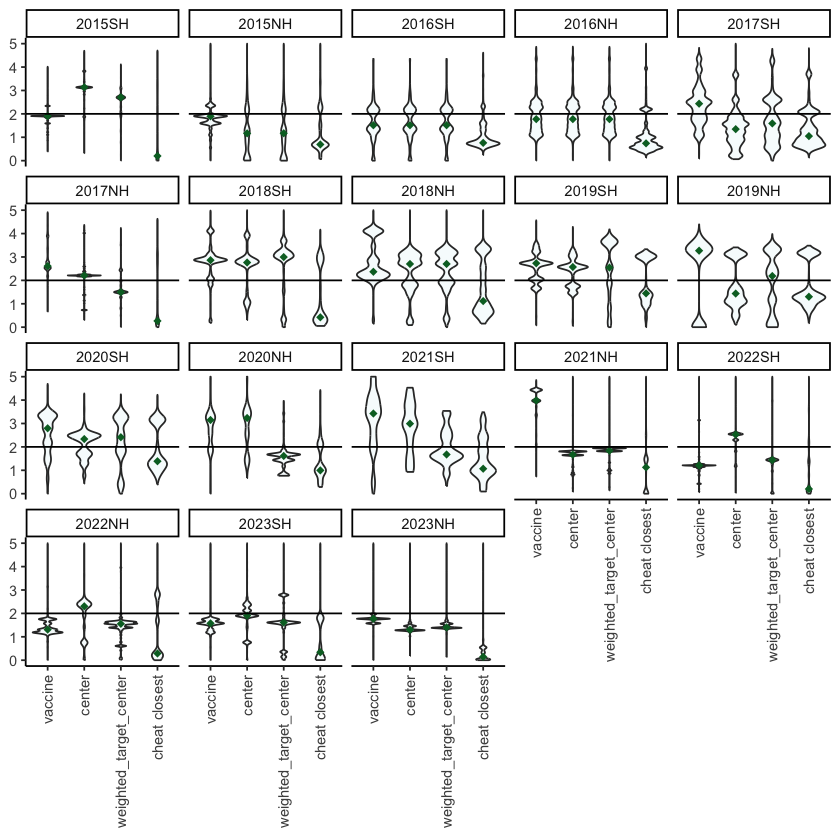

In [16]:

g <- ggplot(sum_data_full.interest.filtered, aes(x=selection_category,y=dist_to_ref_coord)) +
  geom_violin(fill=lg1) +
  stat_summary(fun = median, geom = "point", shape = 18, size = 2, color = dg) +
  geom_hline(yintercept = 2) +
  facet_wrap(~season) +
  scale_y_continuous(limits = c(0,5), oob = squish) +
  theme_classic() +
  theme(
    axis.title.x = element_blank(),
    axis.title.y = element_blank(), #,
    axis.text.x = element_text(angle = 90, vjust = 0.5, hjust = 1)
  )
g
pdf.name <- paste('dist_mean.best_forcast_season_selected.pdf', sep="")
pdf(pdf.name, width = 5, height = 6)
g
dev.off()


pdf 
  2

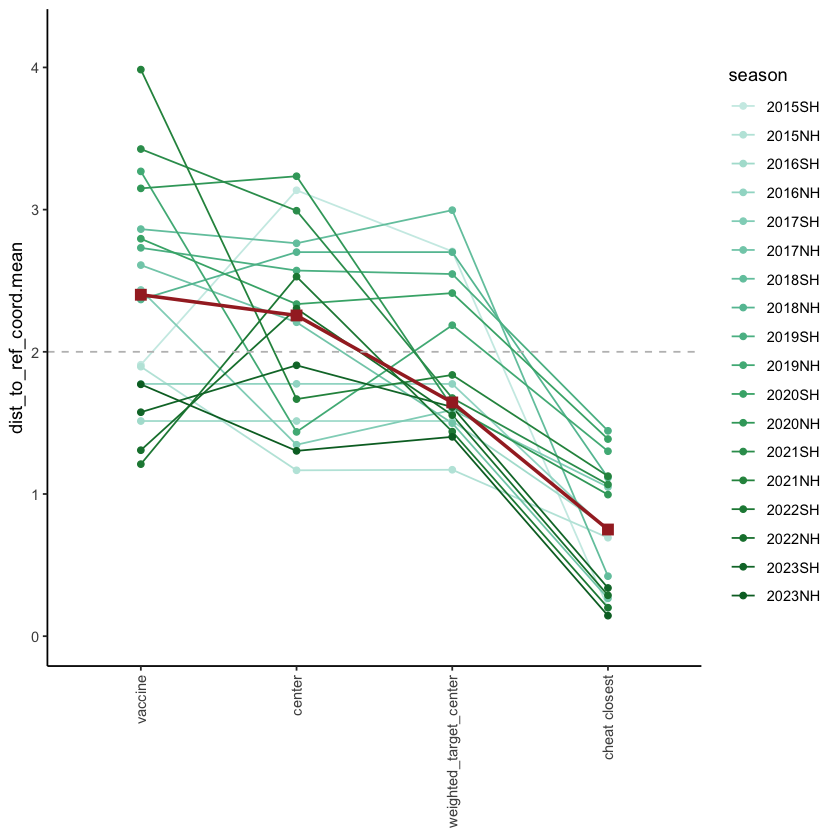

In [17]:

mean_by_category <- sum_data_full.interest.filtered.mean %>%
  group_by(selection_category) %>%
  summarize(dist_to_ref_coord.mean = median(dist_to_ref_coord.mean), .groups = "drop")


# 2. 必要な色数
n_colors <- length(unique(sum_data_full.interest.filtered.mean$season))

# 3. "BuGn" パレットから補間して色を作成
season_colors <- colorRampPalette(c(brewer.pal(9, "BuGn")[3:8]))(n_colors)
names(season_colors) <- unique(sum_data_full.interest.filtered.mean$season)


g <- ggplot(sum_data_full.interest.filtered.mean, aes(x = selection_category, y = dist_to_ref_coord.mean, group = season, color = season)) +
  geom_line() +  # 薄いグレーの折れ線
  geom_point() +
  scale_color_manual(values = season_colors) +
  geom_line(data = mean_by_category, aes(x = selection_category, y = dist_to_ref_coord.mean, group = 1),
            color = "brown", size = 1) +  # 赤色の平均線
  geom_point(data = mean_by_category, aes(x = selection_category, y = dist_to_ref_coord.mean, group = 1),
             color = "brown", shape=15, size = 3) +  # 平均点も追加（任意）
  geom_hline(yintercept = 2, linetype = "dashed", color = "gray") +
  scale_y_continuous(limits = c(0, 4.2), oob = squish) +
  theme_classic() +
  theme(
    axis.title.x = element_blank(),
    axis.text.x = element_text(angle = 90, vjust = 0.5, hjust = 1)
  )

g

pdf.name <- paste('dist_mean.best_forcast_selected_wo_cheat.pdf', sep="")
pdf(pdf.name, width = 3.2, height = 4)
g
dev.off()



In [19]:
season_colors.df <- data.frame(season = names(season_colors), season_numeric = 1:length(season_colors))

g.season.legend <- ggplot(season_colors.df, aes(x = 1, y = season, fill = season_numeric)) +
  geom_tile() +
  theme_classic() +
  scale_fill_gradientn(colors = season_colors)  # 修正ポイント

pdf.name <- 'dist_mean.best_forcast_selected_wo_cheat.legend.pdf'
pdf(pdf.name, width = 4, height = 5)

g.season.legend

dev.off()

pdf 
  2